# <img style="float: left; padding-right: 5px; width: 200px" src="https://http2.mlstatic.com/frontend-assets/ml-web-navigation/ui-navigation/6.6.73/mercadolibre/logo_large_25years@2x.png?width=300">
#Technical Challenge - Categories

## Take Home: Financial Transactions


### Febrero 2025

<hr style="height:2pt">

# Descripción


El siguiente dataset contiene 116.201 registros de transacciones financieras de dominio público, enriquecida con data sintentica.

El objetivo de este ejercicio es realizar un Exploratory Data Analysis (EDA) de este dataset, para entender la información contenida y obtener insights relevantes para ciertas tareas analíticas.

Se puede descargar el dataset (formato parquet) desde este [link](https://drive.google.com/file/d/1RjeIHmtOTxz4M9WVhh8n9YsMTjk-1V80/view?usp=drive_link). Tendrás acceso a este archivo hasta la fecha límite del challenge que se te indicará en el correo.

A continuación, una descripción de las columnas:

| Variable            | Descripción                                                                 |
| :------------------ | :-------------------------------------------------------------------------- |
| account_id          | Número de cuenta involucrado en la transacción.                              |
| date                | Fecha de la transacción.                                                     |
| transaction_details | Narración o descripción de la transacción en los estados de cuenta bancarios.|
| chq_no              | Número de cheque asociado con la transacción, si corresponde.                |
| value_date          | Fecha de finalización de la transacción.                                     |
| withdrawal_amt.     | Monto retirado en la transacción.                                            |
| deposit_amt         | Monto depositado en la transacción.                                          |
| balance_amt         | Saldo actual de la cuenta después de la transacción.                         |
| category            | Categoría asignada basada en los detalles de la transacción.       |
| city                | Ciudad donde se asume que ocurrió la transacción.                  |
| device              | Tipo de dispositivo utilizado para la transacción (e.g., Móvil, Escritorio, Tablet). |

## Tareas

En este notebook se deberá cargar todas las librerías que se necesitan para explorar y procesar el dataset dado, y así realizar el analisis corresponendiente para extraer insights sobre la información dada. Se puede realizar cualquier análisis deseado, pero al final se espera encontrar realizadas las tareas del tipo "requerido". Además, hay algunos aspectos valorados del tipo "deseable" y "bonus" para obtener una valoración sobresaliente en este ejercicio.

El código debe ser desarrollado en Python >= 3.9. Los reportes pueden estar en español o inglés.

### Requerido

- **Data QA:** Se debe chequear la calidad del dataset para hacer una evaluación de qué tan apropiados son los datos para tareas de Data Science. Proponga un conjunto de correcciones en los datos de ser necesario.
- **Reporting:** Documente los resultados e insights obtenidos durante la exploración y describa conclusiones desde una perspectiva de negocio, soportado por gráficos / tablas / métricas.
- **Machine Learning:** Describa las posibles tareas de Machine Learning que podrían realizarse desde el dataset dado, que podrían ser valiosas en el dominio dado (sólo explicar, **no entrenar un modelo**).



### Deseable

- **Versionado de código con Git** (incluso puede publicarse en tu cuenta personal de GitHub!).
- **Feature Engineering:** Indicar y calcular posibles candidatos de features que podrían utilizarse tanto columnas originales y transformaciones.
- **Modelo predictivo:** Realice un modelo predictivo.
- **Mostrar skills en Python:** Teniendo buenas practicas en la estructura del código y la documentación.
- **Casos de uso:** Describir posibles casos de usos a tratar con este dataset que podrían agregar valor al negocio dado, indicando métodos / técnicas y algoritmos por cada uno de ellos, así como justificando las decisiones tomadas.
- **Métricas:** Definir y calcular las métricas que considere más relevantes para la problemática propuesta.

### Bonus

- Manejo de environment de desarrollo mediante alguna tecnología (e.g. Docker, virtualenv, conda).
- Identificar nuevos atributos / tablas que podrían ser relevantes o necesarias para un mejor análisis.
- API que permita consultar el modelo que determines.

Este ejercicio está diseñado para ser completado en ~3 hs siguiendo sólo los aspectos del tipo "requerido", pero se contempla una semana para entregarlo con todos los aspectos que se deseen completar.

Una vez completado este ejercicio, por favor mandar un archivo ZIP de la
carpeta con todos los recursos usados en este trabajo (e.g. Jupyter notebook,
 scripts, documentos, imágenes, etc), también puedes compartir un collab reproducible, o bien el enlace al repositorio de
 GitHub, a `jaison.gonzalez@mercadolibre.com.co`

**Que te diviertas!**

<img src="http://s3.amazonaws.com/melidata-external/data-science-interviews/2021/img/hunger_games_data_meme.jpeg" alt="drawing" style="width:200px;"/>

### Anotaciones

- Está permitido usar las herramientas y librerias que consideres, solo ten presente que luego se te pedirá justificar.
- Aseguraté de que tu trabajo sea reproducible.

# 0) Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_parquet('data/bank_transactions.parquet')

# 1) Data QA

Lo primero que vamos a hacer es asegurarnos de que los datos esten en buenas condiciones para que podamos empezar a extraer valor de ellos. Para esto, vamos a realziar una serie de validaciones basicas, entre ellas:

- Chequeo de valores faltantes
- Detección de duplicados
- Revisión de tipos de datos
- Validación de rangos

In [6]:
def check_missing_values(df):
    """Verifica valores faltantes en cada columna y muestra la cantidad de nulos sobre el total de filas."""
    totals = df.shape[0]
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)

    missing_percentage = (missing / totals) * 100

    missing_summary = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_percentage
    })
    print("Missing Values Summary")
    display(missing_summary)
    return df

def check_duplicates(df):
    """Verifica si hay registros duplicados."""
    duplicates = df.duplicated().sum()
    print(f"Registros duplicados: {duplicates}")
    
    if duplicates > 0:
        df = df.drop_duplicates()
        print("Duplicados eliminados.")
    
    return df

def check_data_types(df):
    """Verifica los tipos de datos y posibles problemas."""
    print("Tipos de datos:")
    display(df.dtypes)
    return df

def check_value_ranges(df):
    """Verifica valores fuera de rango en columnas numéricas."""
    summary = df.describe()
    print("Resumen estadístico de valores numéricos:")
    display(summary)
    
    for col in df.columns:
        if "date" in col:
            print(f"Rango de fechas para la columna {col}: {df[col].min()} || {df[col].max()}")
    
    return df

def plot_distributions(df, columns):
    """Grafica la distribución de variables numéricas para identificar outliers."""
    for col in columns:
        sns.boxplot(x=df[col])
        plt.title(f"Distribución de {col}")
        plt.show()

def clean_extra_strs(df, target_column = "account_id", target_str = "'"):
    df[target_column] = df[target_column].str.replace(target_str, "")
    return df

def check_unique_values(df):
    """Verifica cuántos valores únicos tiene cada columna categórica."""
    categorical_cols = df.select_dtypes(include=["object"]).columns
    for col in categorical_cols:
        unique_values = df[col].nunique()
        print(f"La columna '{col}' tiene {unique_values} valores únicos.")

        if unique_values < 20:
            print("\n ==> ",df[col].unique())
        
        print("\n---------------")
    return df
    
def check_date_format(df, date_cols):
    """Convierte columnas a datetime y revisa valores erróneos."""
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        invalid_dates = df[df[col].isnull()]
        if invalid_dates.shape[0] > 0:
            print(f"⚠️ {invalid_dates.shape[0]} valores inválidos en {col}")
    return df

def display_separator():
    print("\n=====================\n")

def run_quality_checks(df):
    """Ejecuta todas las validaciones de calidad de datos."""

    # null check and cleaning
    check_missing_values(df)
    
    print("Rows before cleaning nulls:", df.shape[0], "Columns:", df.shape[1])
    df.drop(columns=["chq_no"], inplace=True)
    df = df[~df.transaction_details.isnull()]
    print("Rows after cleaning nulls:", df.shape[0], "Columns:", df.shape[1])
    display_separator()
    
    # duplicates
    df = check_duplicates(df)
    display_separator()
    
    # dypes
    df = check_data_types(df)
    display_separator()
    
    # ranges
    df = check_value_ranges(df)
    
    # clean caracters
    df = clean_extra_strs(df)
    display_separator()

    # unique values por categoria
    df = check_unique_values(df)

    # Date format check
    date_columns = [col for col in df.columns if "date" in col]
    df = check_date_format(df, date_columns)
    display_separator()

    # final df
    print("===== Dataframe post cleaning =====")
    display(df)
    return df

In [7]:
df = run_quality_checks(df)

Missing Values Summary


,Missing Values,Percentage
chq_no,115296,99.221177
withdrawal_amt,62652,53.916920
deposit_amt,53549,46.083080
transaction_details,2499,2.150584


Rows before cleaning nulls: 116201 Columns: 11
Rows after cleaning nulls: 113702 Columns: 10


Registros duplicados: 3
Duplicados eliminados.


Tipos de datos:


account_id                     object
date                   datetime64[ns]
transaction_details            object
value_date             datetime64[ns]
withdrawal_amt                float64
deposit_amt                   float64
balance_amt                   float64
category                       object
city                           object
device                         object
dtype: object



Resumen estadístico de valores numéricos:


,date,value_date,withdrawal_amt,deposit_amt,balance_amt
count,113699,113699,5.354700e+04,6.015200e+04,1.136990e+05
mean,2017-05-30 20:05:12.952620288,2017-05-30 20:01:12.823859456,4.489059e+06,3.457544e+06,-1.400712e+09
min,2015-01-01 00:00:00,2015-01-01 00:00:00,1.000000e-02,1.000000e-02,-2.045201e+09
25%,2016-06-15 00:00:00,2016-06-15 00:00:00,3.000000e+03,8.850000e+04,-1.694678e+09
50%,2017-06-23 00:00:00,2017-06-23 00:00:00,4.707300e+04,3.750000e+05,-1.663462e+09
75%,2018-06-02 00:00:00,2018-06-02 00:00:00,5.000000e+06,3.000000e+06,-1.125839e+09
max,2019-03-05 00:00:00,2019-03-05 00:00:00,4.594475e+08,5.448000e+08,8.500000e+06
std,NaN,NaN,1.084860e+07,8.663074e+06,5.397994e+08


Rango de fechas para la columna date: 2015-01-01 00:00:00 || 2019-03-05 00:00:00
Rango de fechas para la columna value_date: 2015-01-01 00:00:00 || 2019-03-05 00:00:00


La columna 'account_id' tiene 10 valores únicos.

 ==>  ['409000611074' '409000493201' '409000425051' '409000405747'
 '409000438611' '409000493210' '409000438620' '1196711' '1196428'
 '409000362497']

---------------
La columna 'transaction_details' tiene 44806 valores únicos.

---------------
La columna 'category' tiene 18 valores únicos.

 ==>  ['Transfer' 'Investment' 'Miscellaneous' 'Loan Payment' 'Subscriptions'
 'Pets & Pet Care' 'Food & Dining' 'Utility Bill' 'Electronics & Gadgets'
 'Insurance' 'Travel' 'Shopping' 'Education' 'Health & Wellness'
 'Charity & Donations' 'Entertainment' 'Transportation'
 'Childcare & Parenting']

---------------
La columna 'city' tiene 10 valores únicos.

 ==>  ['New York' 'Phoenix' 'Dallas' 'San Jose' 'Philadelphia' 'San Antonio'
 'San Diego' 'Houston' 'Los Angeles' 'Chicago']

-

,account_id,date,transaction_details,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2017-06-29,NaN,1000000.0,1.000000e+06,Transfer,New York,Tablet
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2017-07-05,NaN,1000000.0,2.000000e+06,Transfer,Phoenix,Mobile
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2017-07-18,NaN,500000.0,2.500000e+06,Investment,Dallas,Tablet
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,2017-08-01,NaN,3000000.0,5.500000e+06,Transfer,San Jose,Desktop
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,2017-08-16,NaN,500000.0,6.000000e+06,Investment,Philadelphia,Desktop
...,...,...,...,...,...,...,...,...,...,...
116196,409000362497,2019-03-05,TRF TO 1196428 Indiaforensic SE,2019-03-05,117934.30,NaN,-1.901902e+09,Transfer,Phoenix,Mobile
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,2019-03-05,NaN,300000.0,-1.901602e+09,Investment,Phoenix,Tablet
116198,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,2019-03-05,NaN,300000.0,-1.901302e+09,Investment,Phoenix,Mobile
116199,409000362497,2019-03-05,IMPS 05-03-20194C,2019-03-05,109868.65,NaN,-1.901412e+09,Miscellaneous,San Antonio,Desktop


### Primeros comentarios

- Lo primero que notamos es que el dataset contiene una proprocion bastante balanceada entre depositos y withdrawals. Seria interesante estudiar si podemos detectar cuando es mas probable que haya withdrawals o depositos. 

- Por otro lado, los valores absolutos de las transacciones son bastante altos y el balance de algunas cuentas es muy negativo de manera sostenida en el tiempo, sugiriendo que se trata de cuentas corporativas por su gran proporcion de deuda y volumen de transacciones.

- Vemos tambien que chq_no no tiene informacion para la gran mayoria de las entradas del dataset. Si bien podria ser que exista algun patron entre los casos que SI contienen informacion para este campo, por simplicidad se trabajará desde ahora en adelante sin esta columna.

- Notamos que la gran mayoria de filas del dataset contiene transaction details. Los casos que no tienen informacion en este campo, seran eliminados del analisis, para simplificar el mismo y poder utilizar esta columna como variable predictiva con mayor confianza, mas adelante en el proceso.

- En cuanto a datos duplicados y dataypes, los datos parecen estar en buenas condiciones.

- Notamos que el *account_id* esta guardado como un string, pero tiene caracteres extra al final y al principio. Quitamos estos caracteres para simplificar la manipulacion de los datos en el futuro.

# 2) EDA y Feature Engineering

### 2.1) Evolucion Temporal de las transacciones 📈

> Que podemos observar a partir de estudiar como evolucionan las transacciones y el balance, para cada usuario, a lo largo del tiempo?

> Podemos categorizar a los clientes segun su nivel de actividad, su ratio de endeudamiento / cashflow, o lifetime como clientes?

> Existe algun grado de estacionalidad para las transacciones globales? (dejamos el detalle de estacionalidad especifica por cliente para un analisis en mayor detalle)

A continuacion observamos como se ven las series temporales de transacciones y balances para cada uno de nuestros usuarios en la muestra:

In [8]:
def plot_time_series(df, date_col="date", numeric_cols = ["withdrawal_amt", "deposit_amt", "balance_amt"]):
    """Grafica la evolución en el tiempo de withdrawals, deposits y balance, mostrando cada account_id en la gráfica global."""
    
    # Validación: Verifica que las columnas necesarias existan
    missing_cols = [col for col in [date_col, "account_id"] + numeric_cols if col not in df.columns]
    if missing_cols:
        print(f"⚠️ Advertencia: Faltan las siguientes columnas: {missing_cols}. Se omitirán las gráficas.")
        return df
    
    # Convertir a datetime por si acaso
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # Ordenar el DataFrame por fecha
    df = df.sort_values(by=date_col)
    
    # 📊 **Gráfico Global con todas las cuentas**
    print("=================================================")
    print("📈 Series Temporales Globales por Account ID")
    print("=================================================")
    
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x=date_col, y=col, hue="account_id", alpha=0.7, palette="tab10")
        plt.title(f"Evolución de {col} (Global, por Account ID)")
        plt.xlabel("Fecha")
        plt.ylabel(col)
        plt.legend(title="Account ID", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()
    
    # 📊 **Gráficos individuales por account_id**
    account_ids = df["account_id"].unique()
    print("\n=================================================")
    print("📈 Series Temporales por Account ID")
    print("=================================================\n")

    # Si hay demasiadas cuentas, solo grafica las primeras 10 para evitar sobrecarga
    if len(account_ids) > 10:
        print(f"🔹 Hay {len(account_ids)} cuentas. Se mostrarán las primeras 10.")
        account_ids = account_ids[:10]
    
    for account in account_ids:
        print(f"\n🔹 Account ID: {account}\n")
        df_acc = df[df["account_id"] == account]

        fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 10), sharex=True)
        for i, col in enumerate(numeric_cols):
            sns.lineplot(data=df_acc, x=date_col, y=col, ax=axes[i])
            axes[i].set_title(f"Evolución de {col} (Cuenta {account})")
            axes[i].set_xlabel("Fecha")
            axes[i].set_ylabel(col)

        plt.tight_layout()
        plt.show()


📈 Series Temporales Globales por Account ID


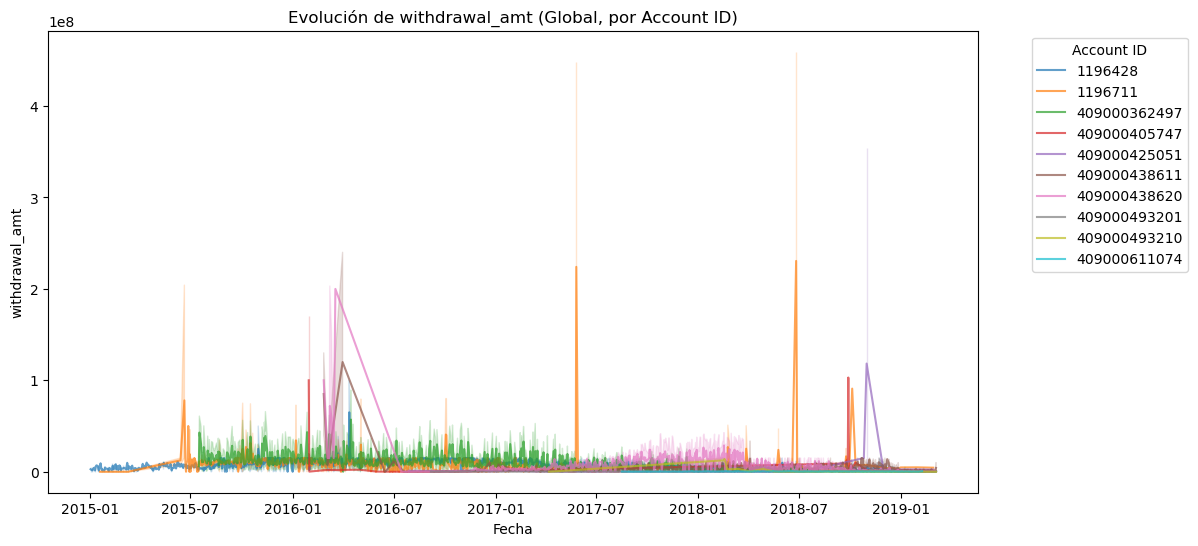

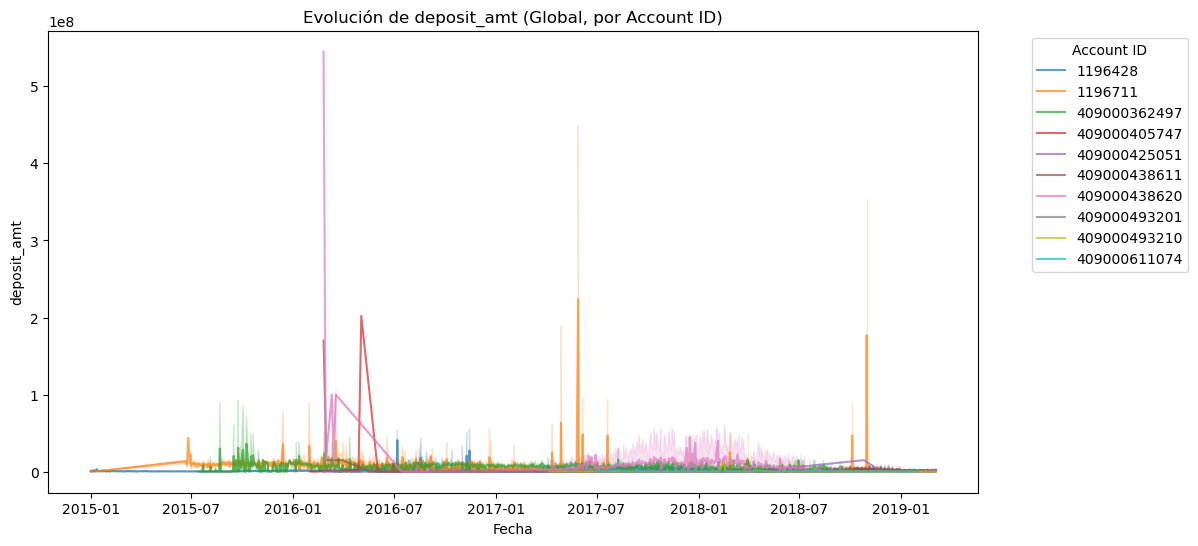

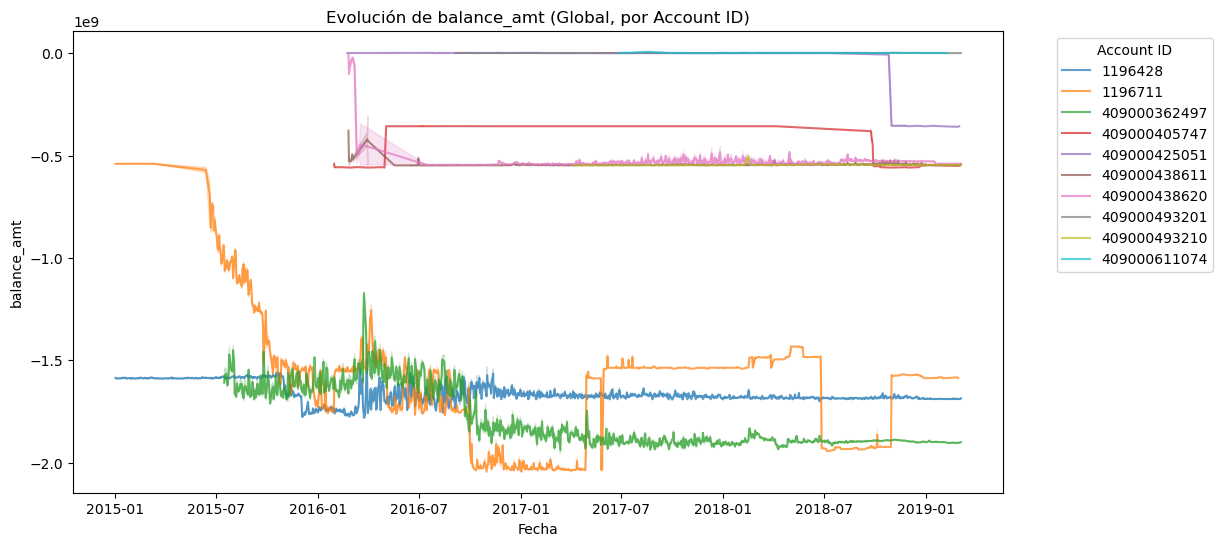


📈 Series Temporales por Account ID


🔹 Account ID: 1196428



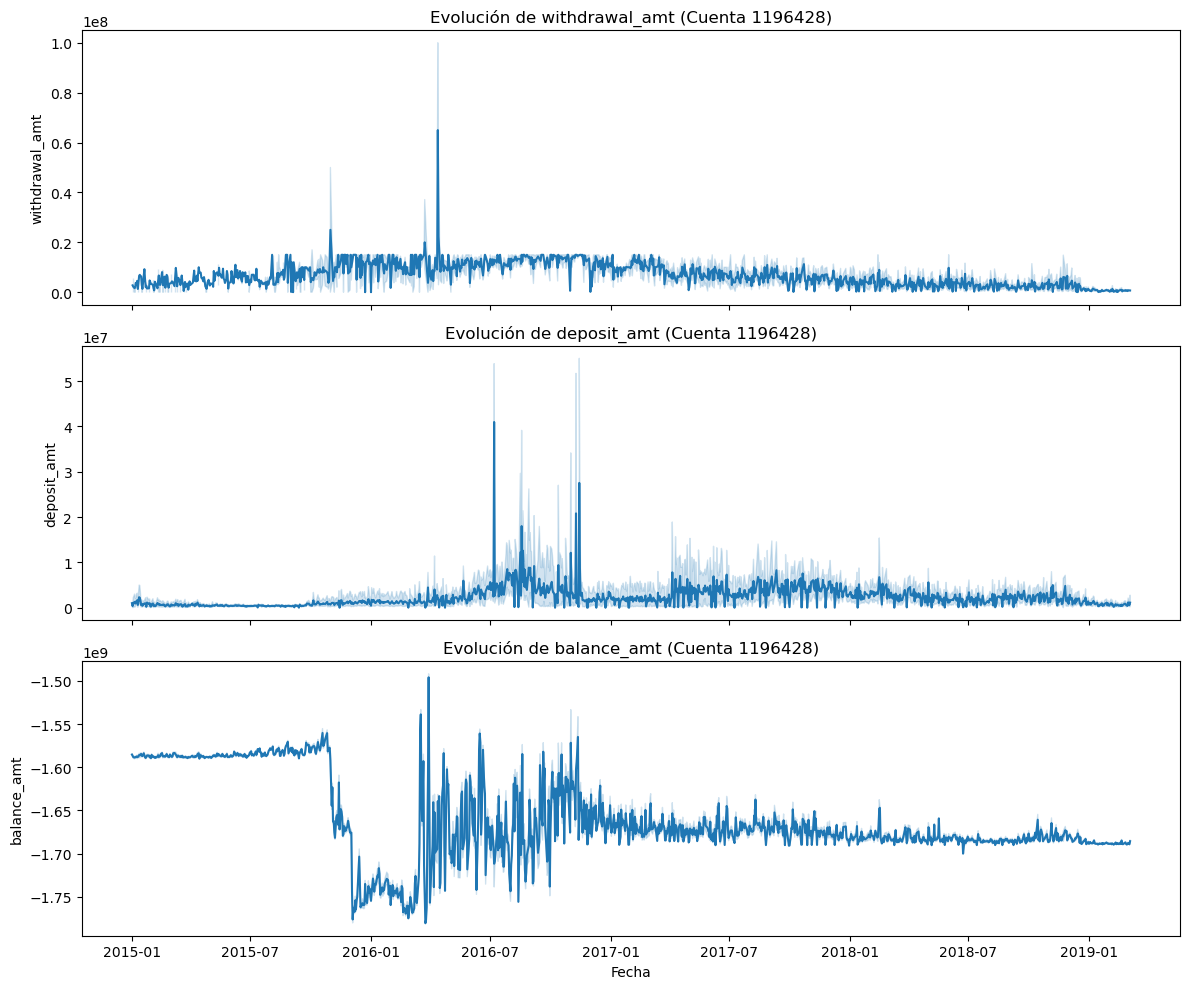


🔹 Account ID: 1196711



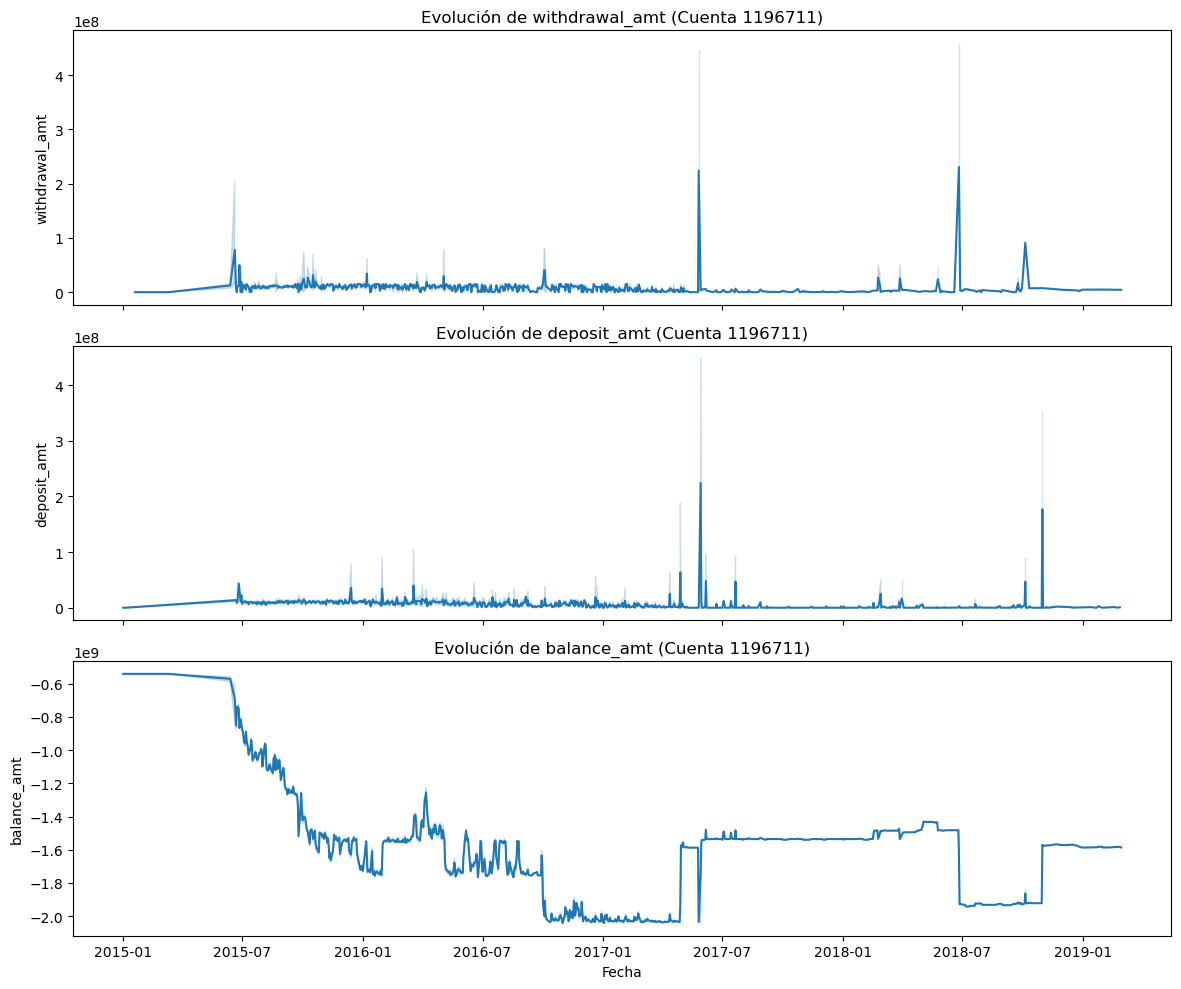


🔹 Account ID: 409000362497



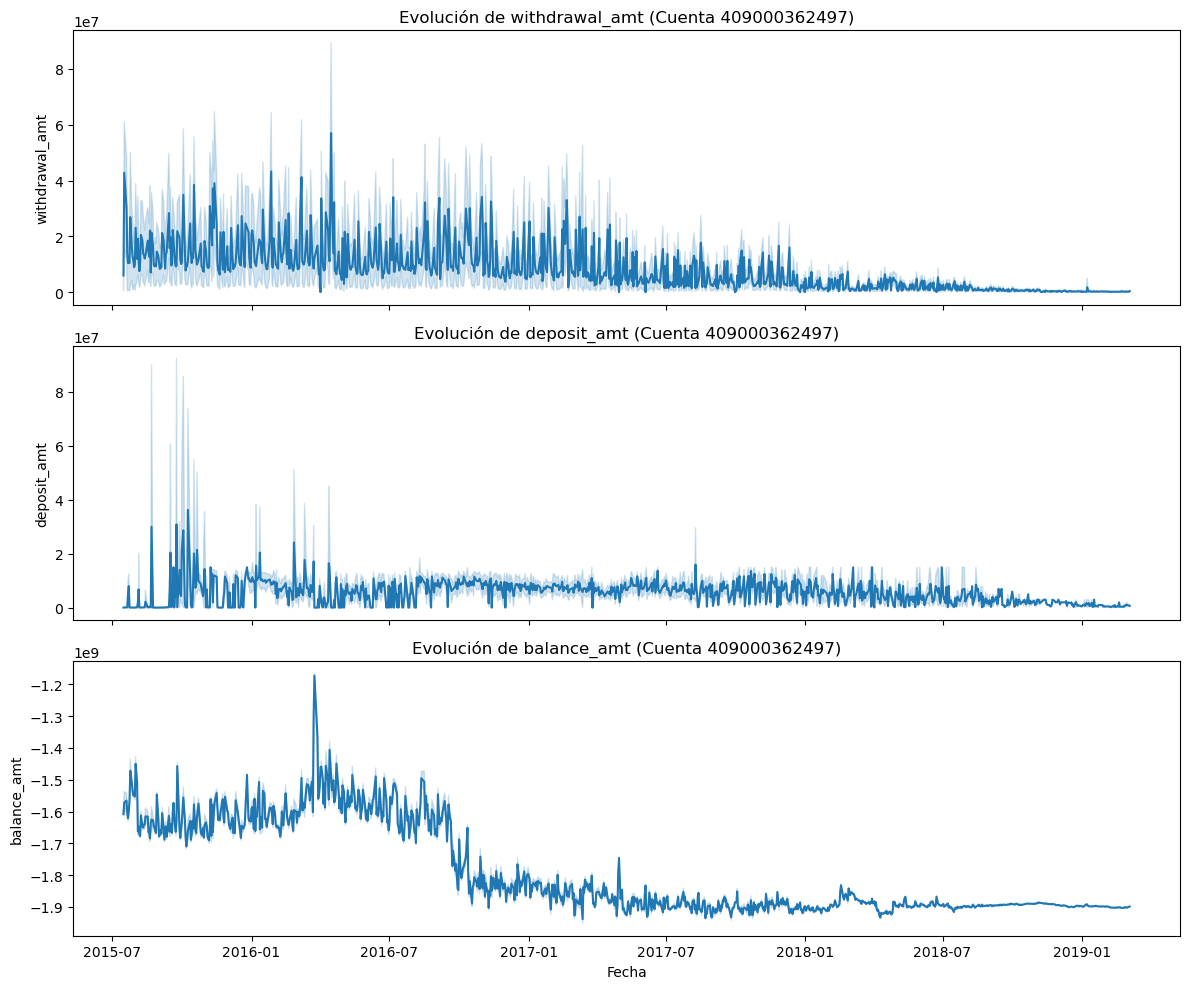


🔹 Account ID: 409000405747



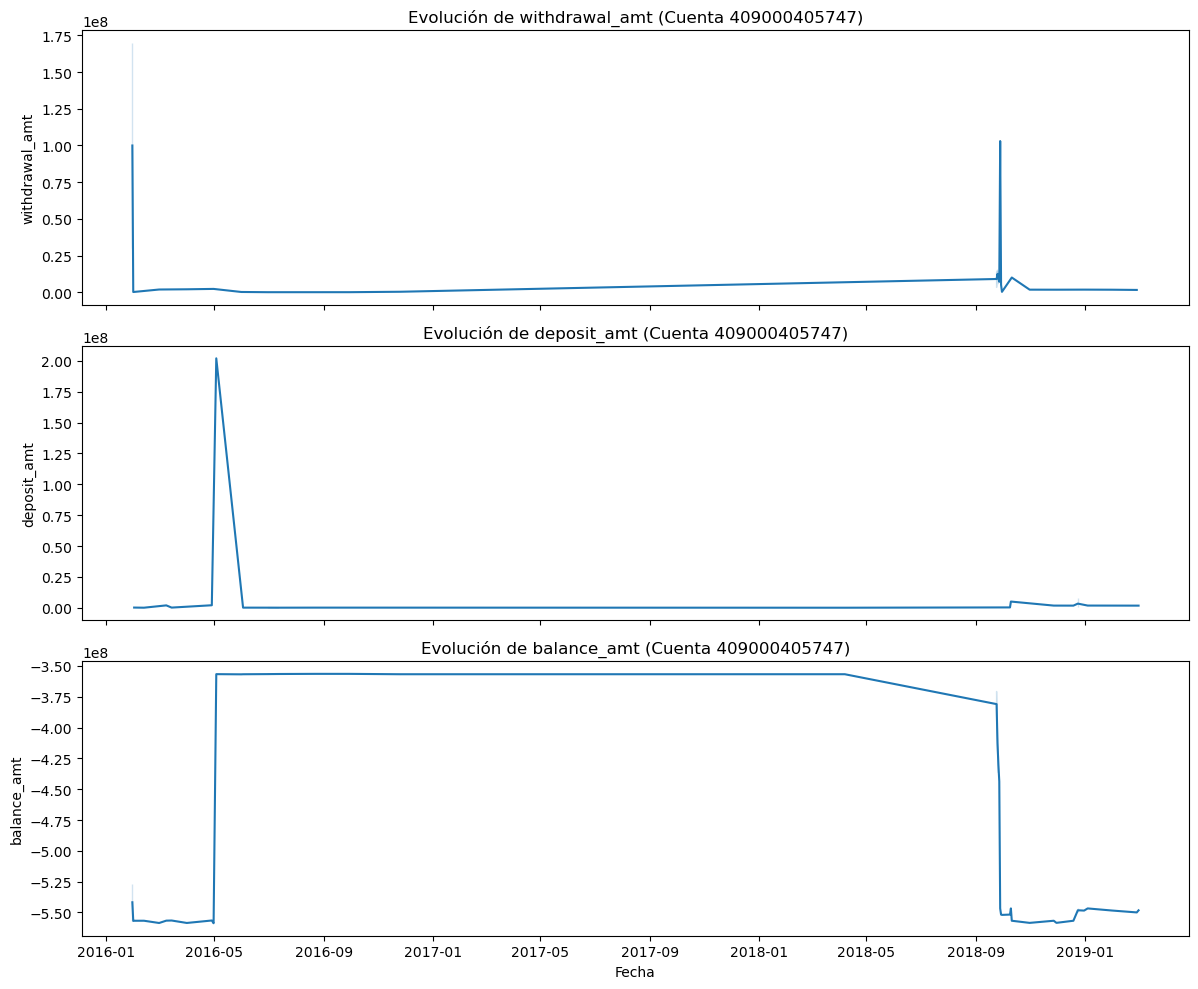


🔹 Account ID: 409000425051



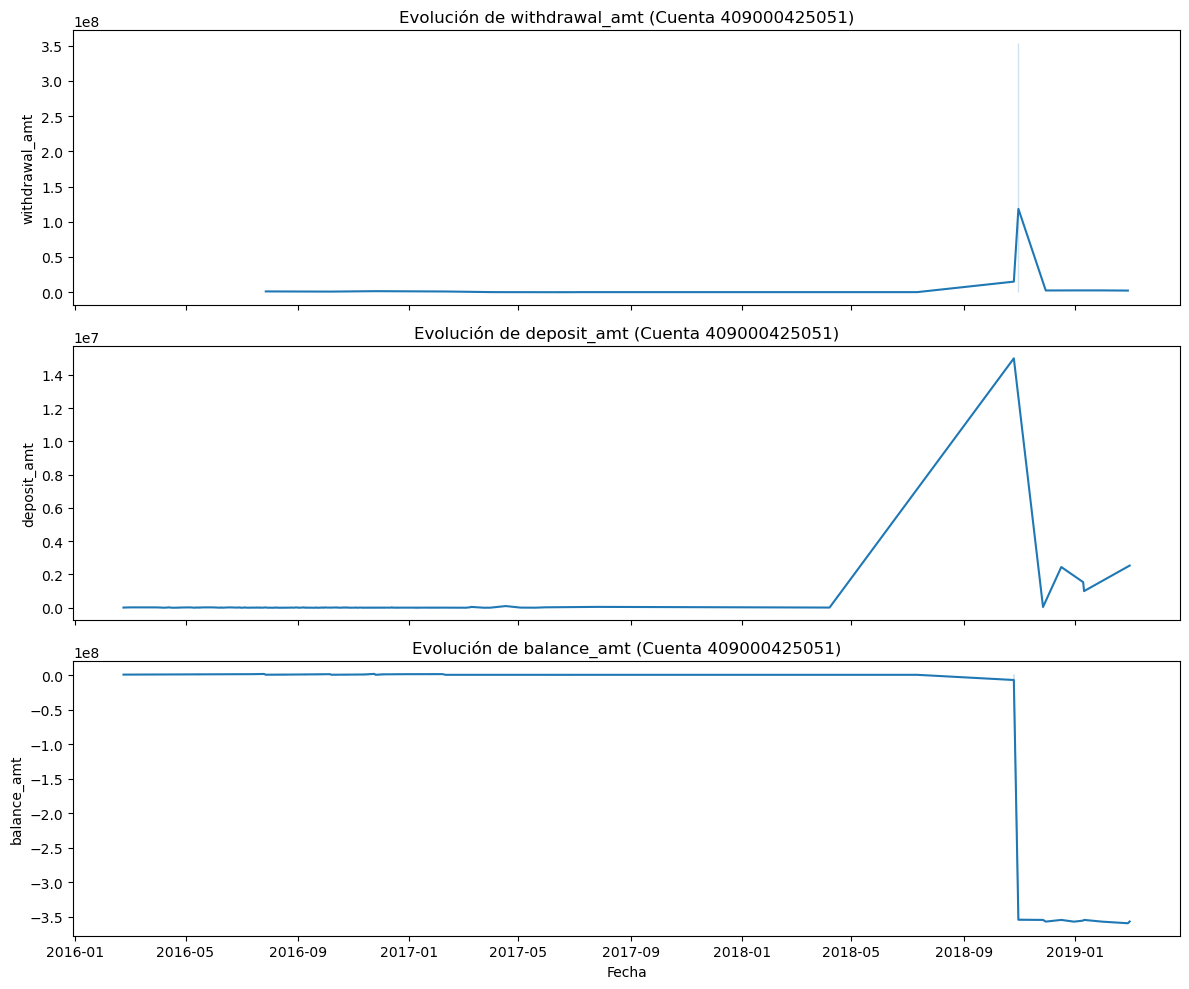


🔹 Account ID: 409000438611



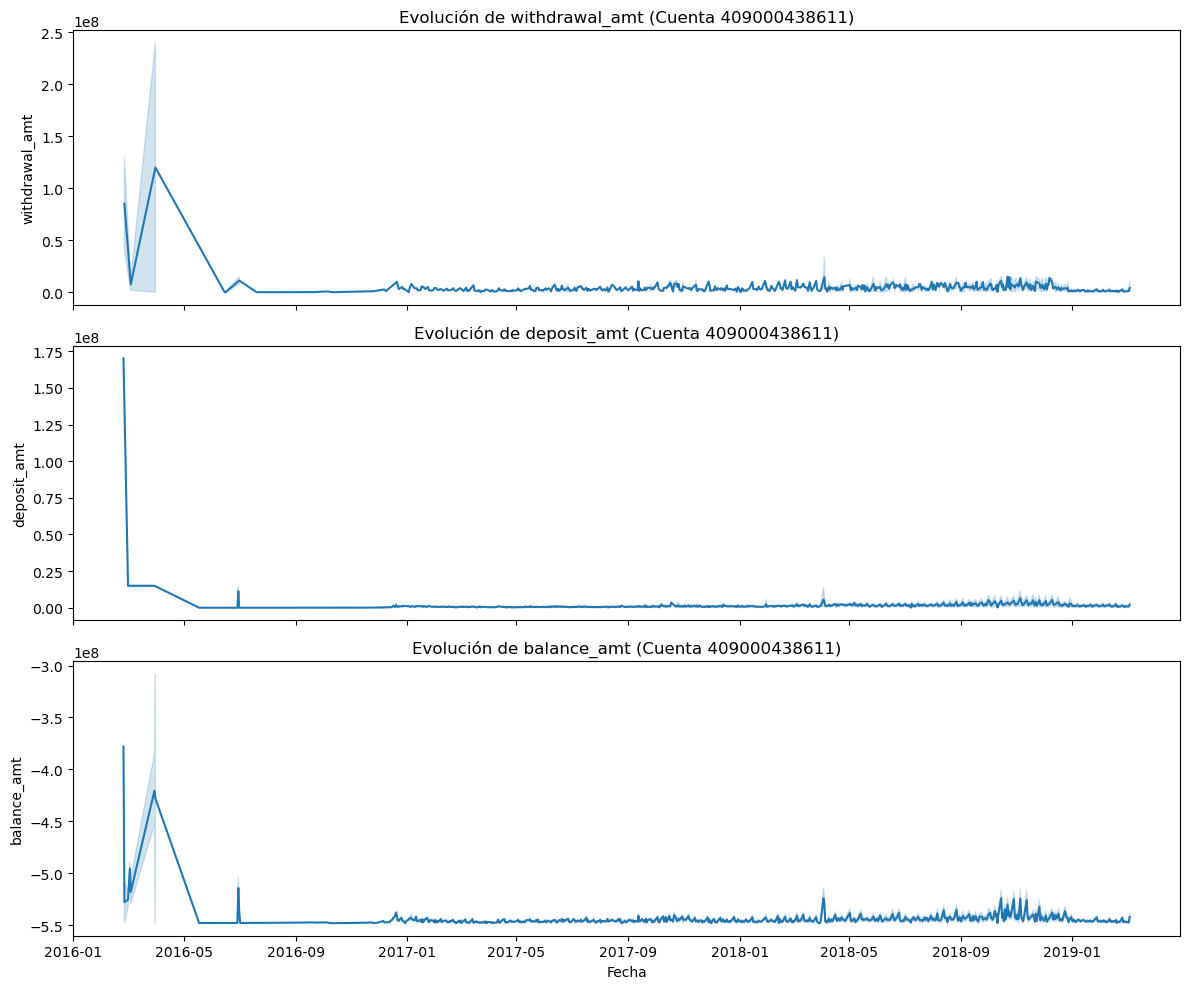


🔹 Account ID: 409000438620



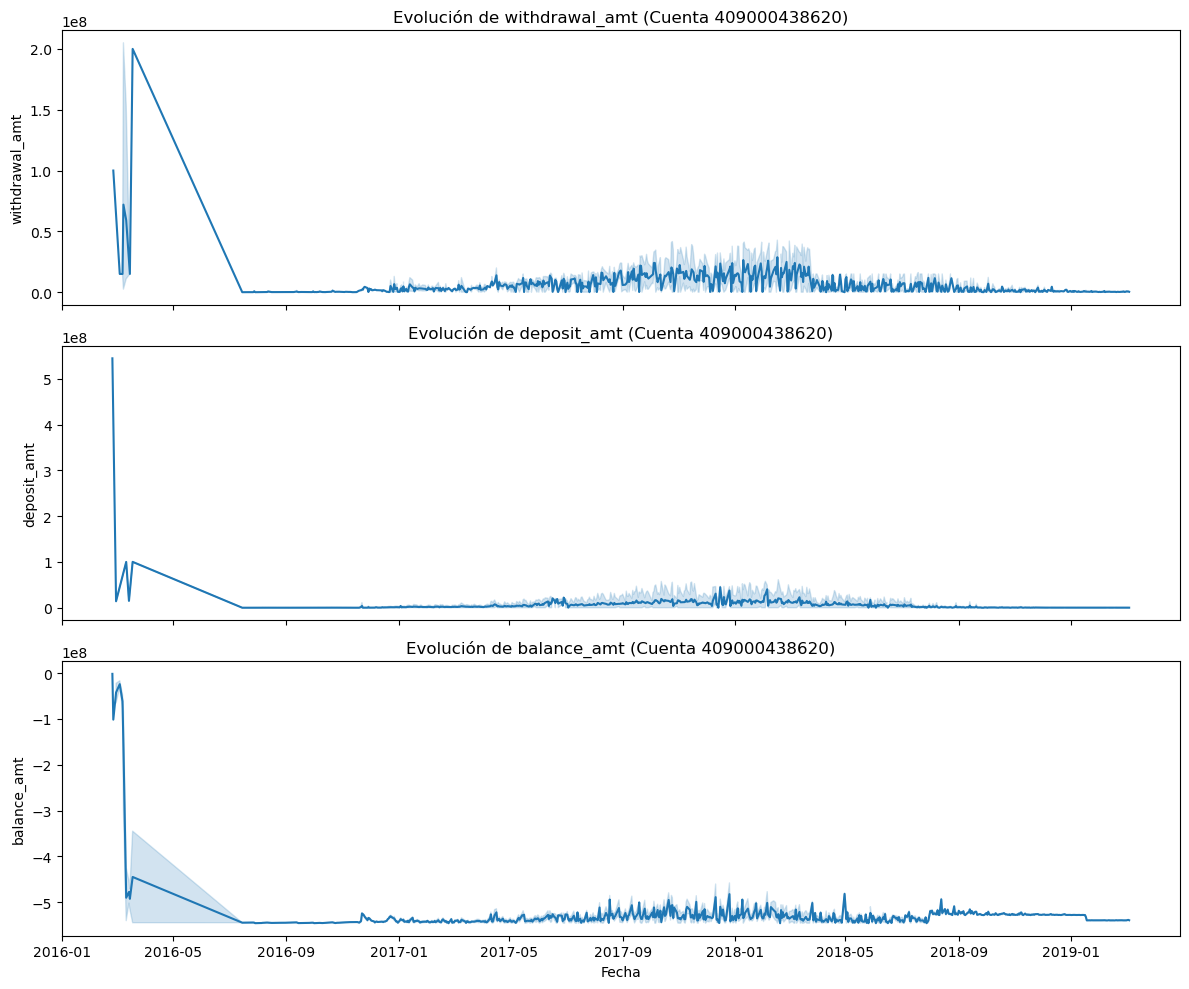


🔹 Account ID: 409000493201



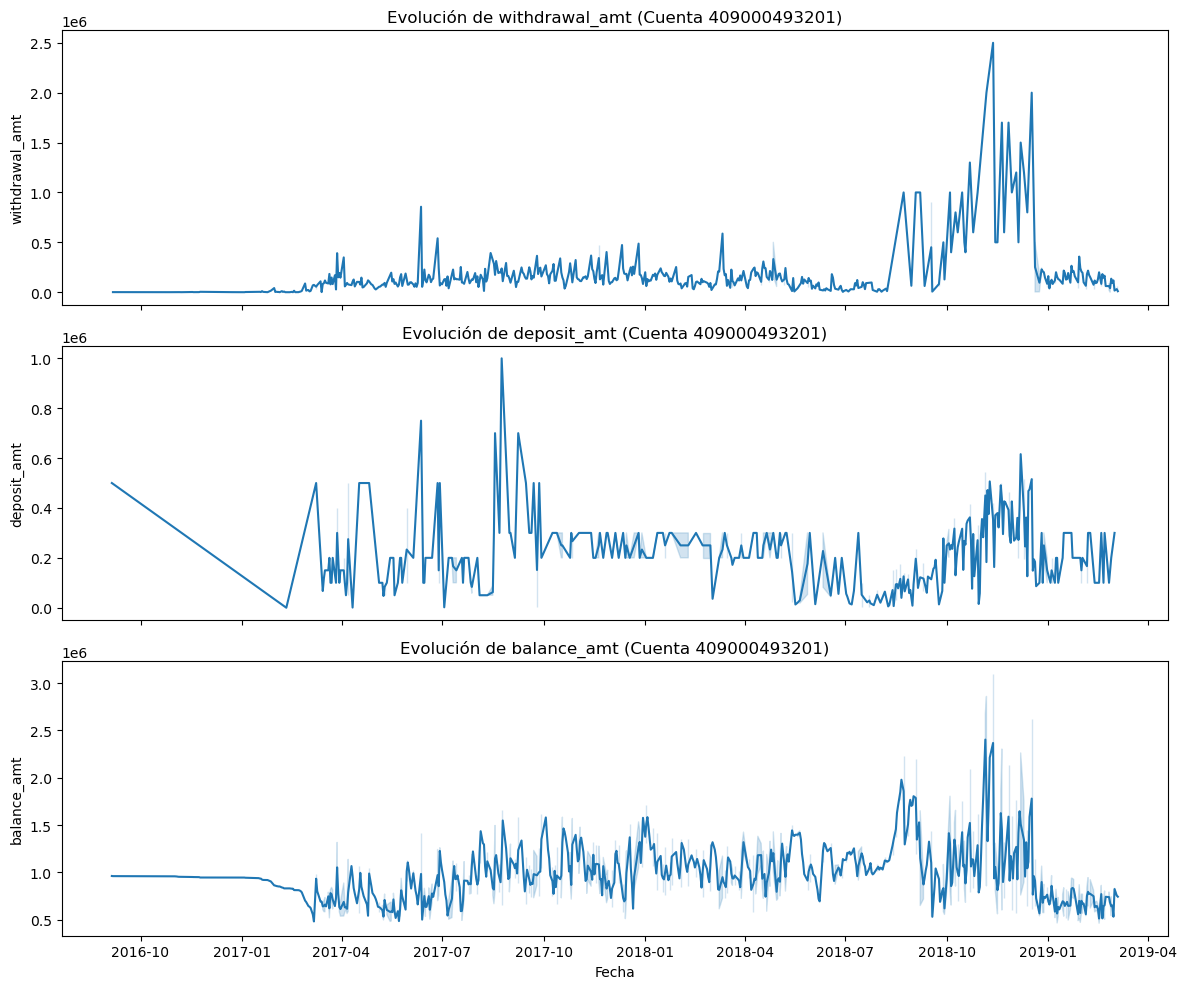


🔹 Account ID: 409000493210



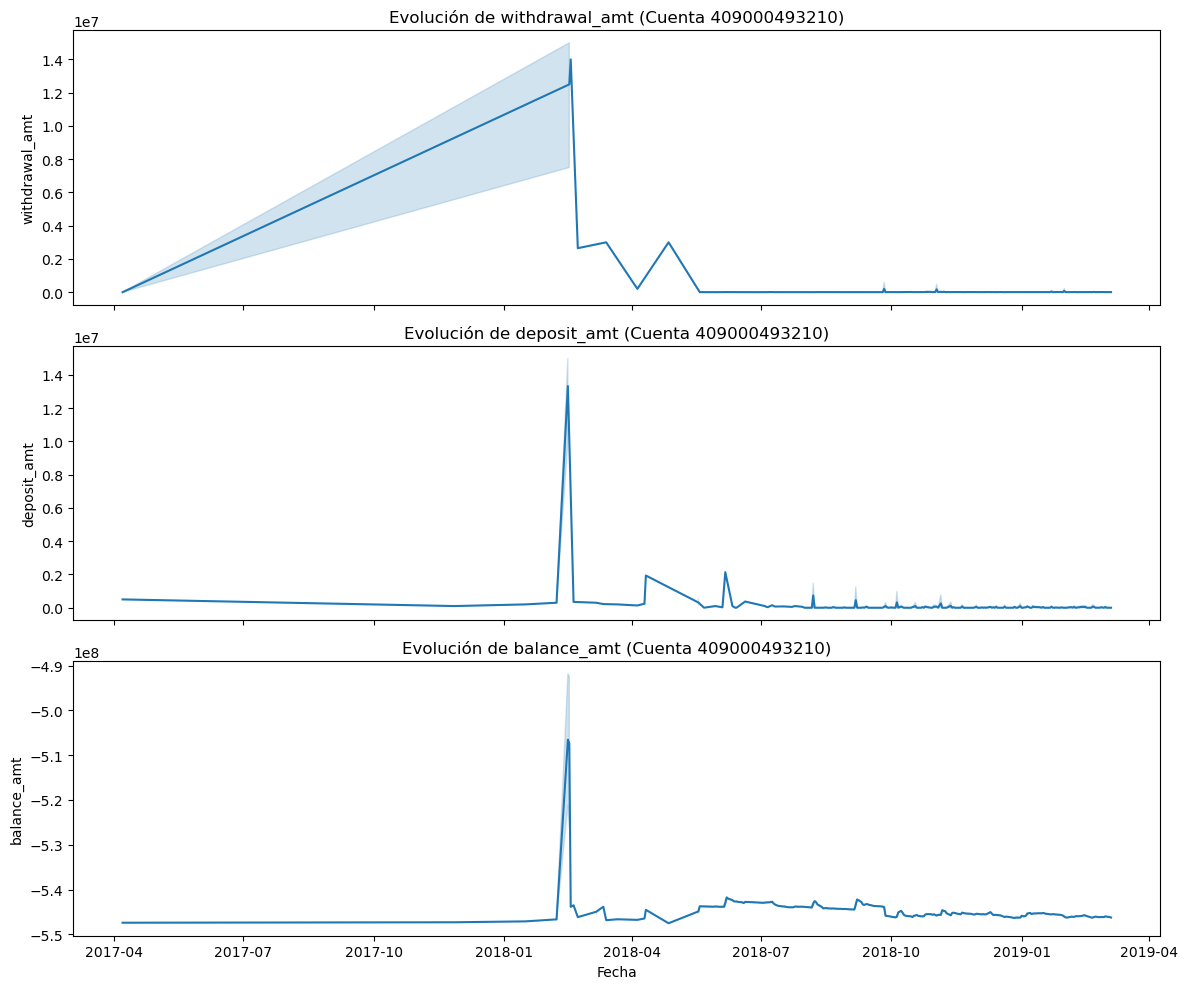


🔹 Account ID: 409000611074



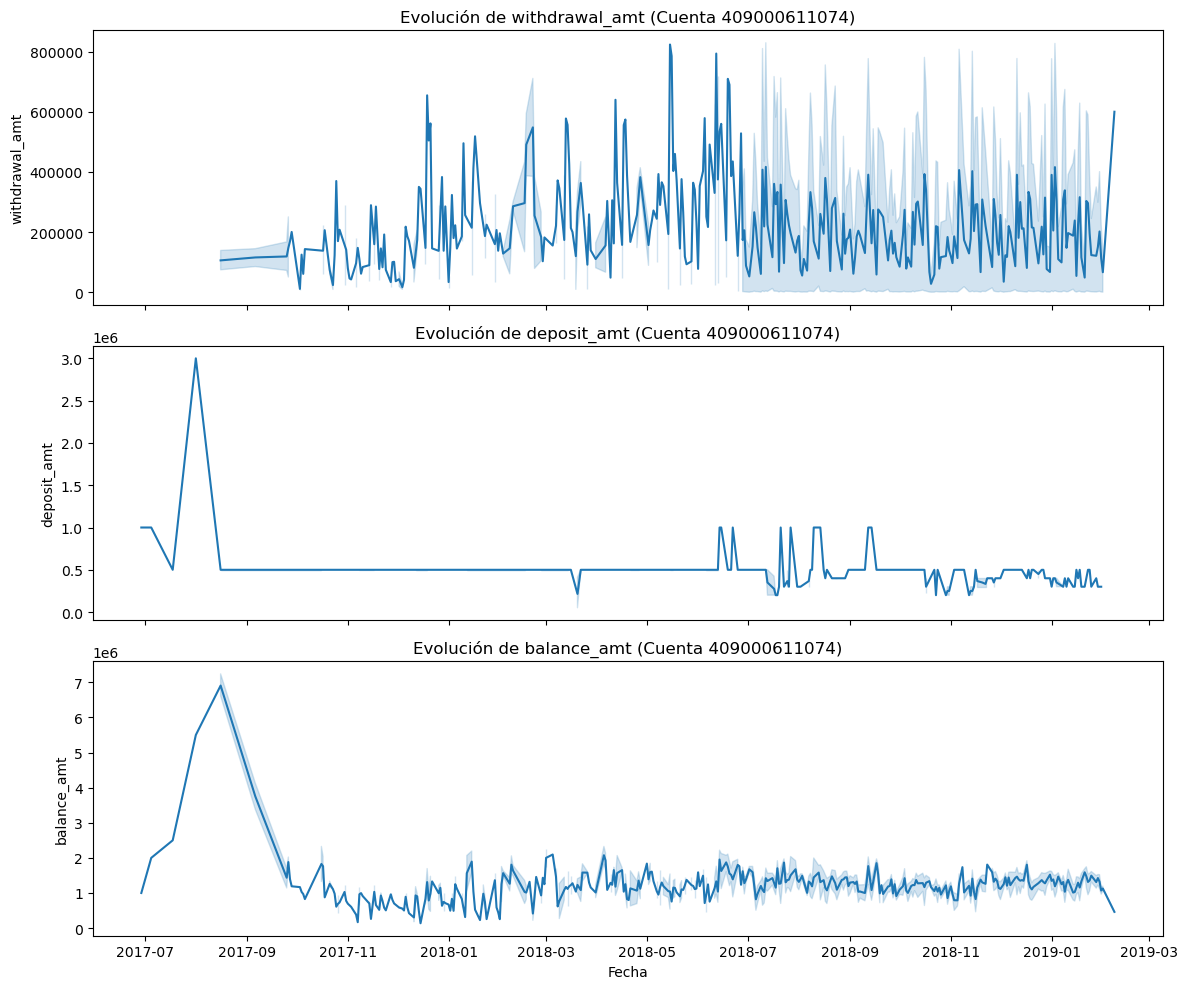

In [9]:
plot_time_series(df)

#### Comentarios sobre la evolucion temporal

- Si bien existen outliers en terminos de valor absoluto de transaccion para cada account_id y en terminos globales del dataset, por ahora los mismos no seran eliminados, ya que justamente estos outliers podrian ser de gran utilidad en el futuro para entrenar algoritmos de deteccion de fraude o anomalias, o aportar informacion para modelos de series de tiempo.

- Observamos tambien que podemos agrupar, inicialmente, a los usuarios en diferentes categorias segun su nivel de endeudamiento (para simplificar, lo calcularemos como la diferencia historica entre flujos positivos y flujos negativos), su nivel de actividad y su antiguedad como clientes. Si bien probablemente haya muchas mas categorias entre las cuales podemos ubicar a estos clientes, comenzaremos por estas variables. 

#### Existe Estacionalidad?

Para estudiar si la cantidad de depositos y retiros se ve afectada por el periodo del año, realizaremos un primer analisis (simple) en el cual buscaremos probar si:

- La **cantidad** de transacciones se ve afectada por el **mes** del año
- La **media** de los depositos / retiros se ve afectada por el **mes** del año

Con mas tiempo y posibilidad de estudiar las distribuciones de los datos a fondo, seria apropiado realizar tests de ANOVA (o sus variantes no parametricas) para validar estos supuestos. Como no disponemos de mucho tiempo. Realizaremos un primer analisis grafico para entender si tiene sentido profundizar dichos estudios en el futuro

In [10]:
# creamos una clasificacion de la transaccion
df['transactionType'] = np.where(
    (df['withdrawal_amt'] > 0) & pd.isnull(df['deposit_amt']), 'withdrawal', 
    np.where(pd.isnull(df['withdrawal_amt']) & (df['deposit_amt'] > 0), 'deposit',
    np.where(pd.isnull(df['withdrawal_amt']) & pd.isnull(df['deposit_amt']), 'no transaction', 'both')
  )
)
# Agregar columna del mes
df["month"] = df["date"].dt.month
df.head()

,account_id,date,transaction_details,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device,transactionType,month
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2017-06-29,NaN,1000000.0,1000000.0,Transfer,New York,Tablet,deposit,6
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2017-07-05,NaN,1000000.0,2000000.0,Transfer,Phoenix,Mobile,deposit,7
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2017-07-18,NaN,500000.0,2500000.0,Investment,Dallas,Tablet,deposit,7
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,2017-08-01,NaN,3000000.0,5500000.0,Transfer,San Jose,Desktop,deposit,8
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,2017-08-16,NaN,500000.0,6000000.0,Investment,Philadelphia,Desktop,deposit,8


In [11]:
deposits = df[df.transactionType == "deposit"]
withdrwals = df[df.transactionType == "withdrawal"]

#### 🟢 Estacionalidad - Depositos

In [12]:
# Calcular la cantidad promedio de transacciones por mes
monthly_counts = deposits.groupby("month")["transactionType"].count().rename("avg_transaction_count")

# Calcular el monto promedio de transacciones por mes
monthly_amounts = deposits.groupby("month")[["deposit_amt", "withdrawal_amt"]].mean()

# Combinar ambos resultados en un solo DataFrame
monthly_stats = monthly_counts.to_frame().join(monthly_amounts)

print(monthly_stats)

       avg_transaction_count   deposit_amt  withdrawal_amt
month                                                     
1                       5526  3.303102e+06             NaN
2                       5179  2.887783e+06             NaN
3                       4646  3.313841e+06             NaN
4                       4187  3.483778e+06             NaN
5                       4855  3.044311e+06             NaN
6                       4053  3.472347e+06             NaN
7                       5206  3.021716e+06             NaN
8                       5249  3.690644e+06             NaN
9                       4993  3.924816e+06             NaN
10                      5112  4.492884e+06             NaN
11                      5595  3.559399e+06             NaN
12                      5551  3.305873e+06             NaN


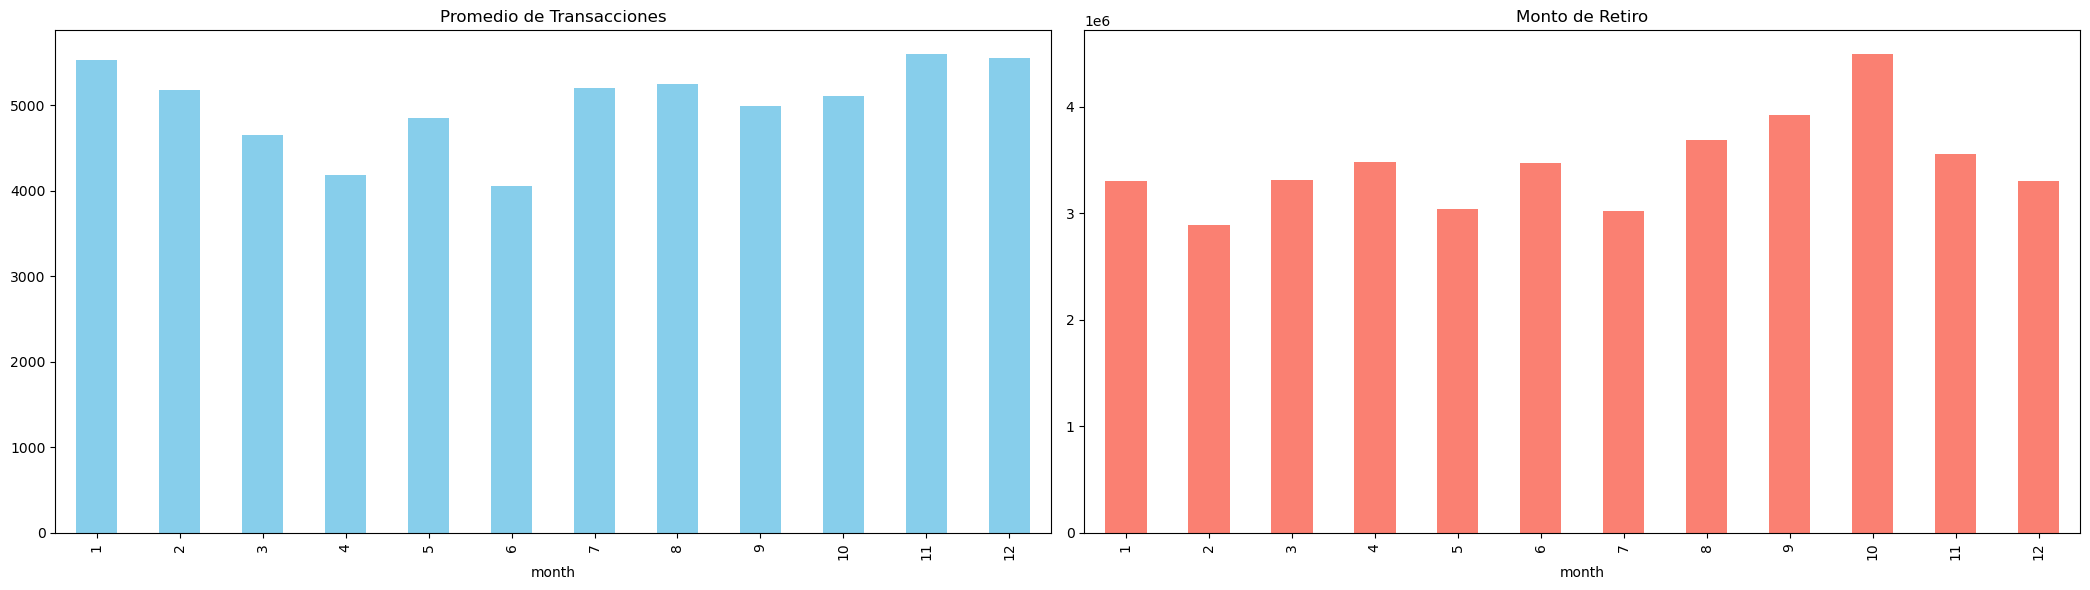

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6))  # 1 fila, 3 columnas
# Gráfico 1: avg_transaction_count
monthly_stats.avg_transaction_count.plot.bar(ax=axes[0], color='skyblue')  # Color azul claro
axes[0].set_title('Promedio de Transacciones')
# Gráfico 2: withdrawal_amt
monthly_stats.deposit_amt.plot.bar(ax=axes[1], color='salmon')  # Color salmón
axes[1].set_title('Monto de Retiro')
# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()

Para el primer caso de los retiros, vemos que para la **cantidad** de transacciones se ve una ligera fluctuacion, pero que SI requeriria un test estadistico algo mas riguroso para poder estudiar si tenemos una diferencia significa para cada mes. 

Para los **montos** ($) por mes, si podemos observar que hay diferencias mas significativas, con mayores cantidades hacia final del año. En este caso, es importante observar que los montos graficados son las *medias*, y que las mismas podrian verse afectadas por outliers, por lo que seria prudente realizar un analisis similar pero utilizando un estimador mas conservador como la mediana. 

#### 🔴 Estacionalidad - Retiros

In [14]:
# Calcular la cantidad promedio de transacciones por mes
monthly_counts = withdrwals.groupby("month")["transactionType"].count().rename("avg_transaction_count")

# Calcular el monto promedio de transacciones por mes
monthly_amounts = withdrwals.groupby("month")[["deposit_amt", "withdrawal_amt"]].mean()

# Combinar ambos resultados en un solo DataFrame
monthly_stats = monthly_counts.to_frame().join(monthly_amounts)

print(monthly_stats)

       avg_transaction_count  deposit_amt  withdrawal_amt
month                                                    
1                       4968          NaN    3.721464e+06
2                       4085          NaN    4.105114e+06
3                       3508          NaN    5.095850e+06
4                       3256          NaN    5.201130e+06
5                       3859          NaN    4.277443e+06
6                       3808          NaN    4.546943e+06
7                       5571          NaN    3.533382e+06
8                       5201          NaN    4.707120e+06
9                       5295          NaN    4.547236e+06
10                      4871          NaN    5.119852e+06
11                      4391          NaN    5.067111e+06
12                      4734          NaN    4.447227e+06


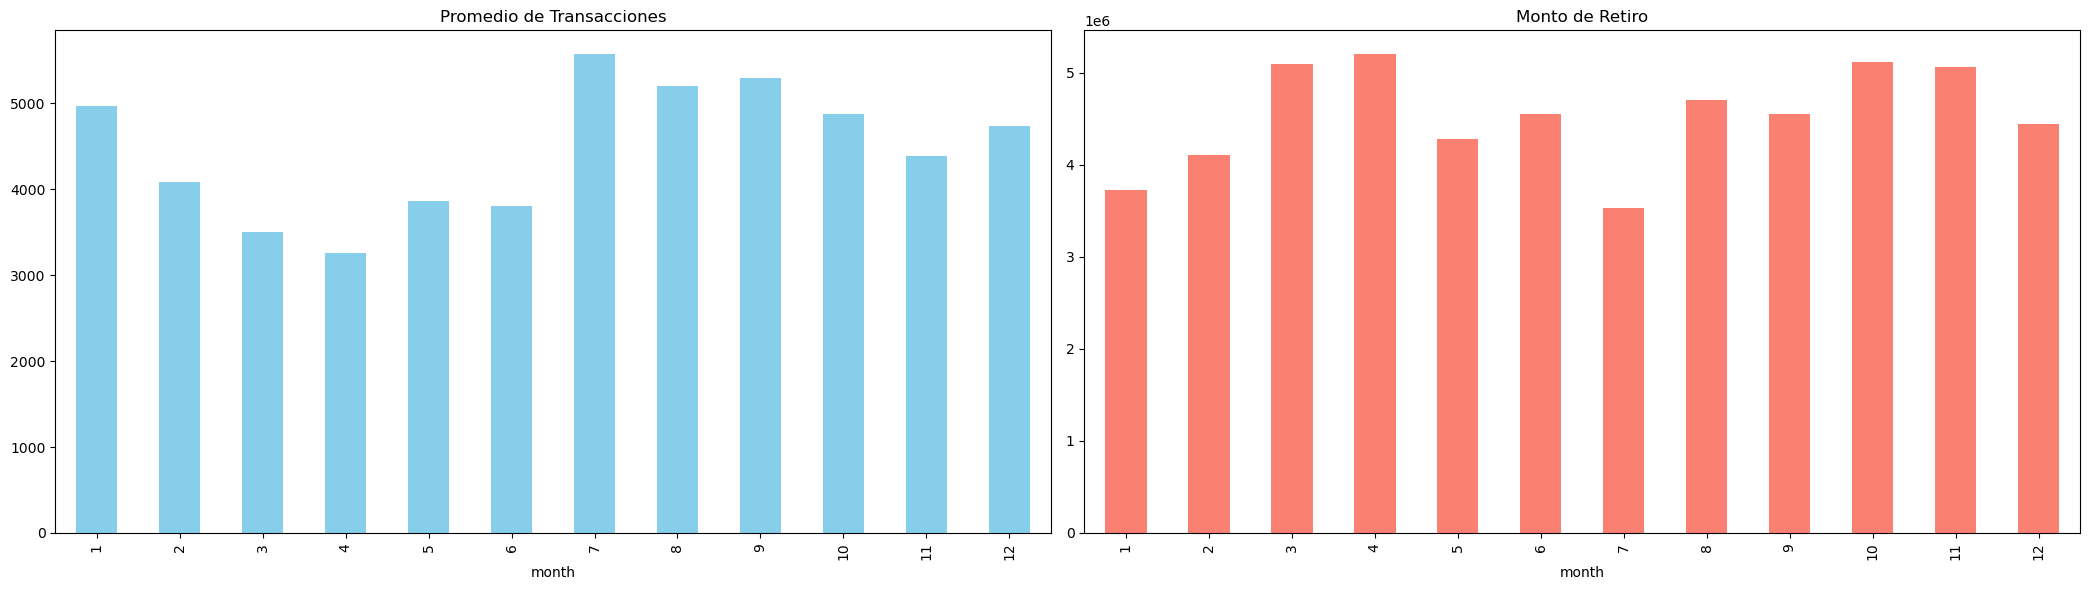

In [15]:
# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(21, 6))  # 1 fila, 3 columnas
# Gráfico 1: avg_transaction_count
monthly_stats.avg_transaction_count.plot.bar(ax=axes[0], color='skyblue')  # Color azul claro
axes[0].set_title('Promedio de Transacciones')
# Gráfico 2: withdrawal_amt
monthly_stats.withdrawal_amt.plot.bar(ax=axes[1], color='salmon')  # Color salmón
axes[1].set_title('Monto de Retiro')
# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()

Analizando los retiros, si podemos observar que hay una diferencia mas grande entre la cantidad de transacciones para cada mes, mostrando un maximo en la cantidad de retiros para el mes de julio. Diferencia que probablemente se confirmara si realizaramos un test estadistico mas riguroso, permitiendonos genralizar el insight de manera signfitiva mas alla de la muestra. 

En el caso de los montos, observamos que en promedio, las cantidades de retiros son mayores en los meses que coinciden con los finales/comienzos de quarter. Podriamos elaborar varias hipotesis de por que esto sucede asi, como por ejemplo necesidad de cierres de cuentas o indicadores por objetivos estrategicos. Independientemente de los motivos subyacentes, podemos utilizar esta informacion sobre la estacionalidad estudiar la posibilidad de predecir el comportamiento de las transacciones en el futuro.

### 2.2) Customer Metrics: Ingresos vs Egresos, nivel de actividad, y antiguedad 💆‍♂️ 💆‍♀️

A continuacion, creamos metricas explicativas sobre el comportamiento de nuestros usuarios en base a la muestra dada:

In [16]:
from datetime import datetime

def calculate_customer_metrics(df, date_col="date"):
    """Calcula indicadores clave de endeudamiento, actividad y antigüedad para cada usuario."""
    
    # Convertir fechas si es necesario
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Agrupar por usuario
    grouped = df.groupby("account_id").agg(
        first_transaction = (date_col, "min"),
        last_transaction = (date_col, "max"),
        total_deposits_amt = ("deposit_amt", "sum"),
        total_withdrawals_amt = ("withdrawal_amt", "sum"),
        median_balance = ("balance_amt", "median"),
        mean_balance = ("balance_amt", "mean"),
        std_balance = ("balance_amt", "std"),
        total_transactions = ("date", "count") # each transaction has a unique date timestamp
    )
    
    # Calcular 'negative_balance_days' y 'active_months' con apply
    grouped["negative_balance_days"] = df.groupby("account_id")["balance_amt"].apply(lambda x: (x < 0).sum()) # dias en los cuales estuvo con balance negativo
    grouped["active_months"] = df.groupby("account_id")[date_col].apply(lambda x: x.dt.to_period("M").nunique()) # cantidad de meses que estuvo activo (tuvo transacciones)
    
    # Calcular métricas derivadas
    grouped["cashflow_delta"] = grouped["total_deposits_amt"] - grouped["total_withdrawals_amt"]
    
    # Ojo, aca asumimos que estamos analizando este dataset al final del periodo, osea en 2019 aprox y no en 2025, ya que eso cambia bastante los resultados.
    reference_date = datetime(2019, 10, 31)  # Fin de 2019

    grouped["customer_age_days"] = (reference_date - grouped["first_transaction"]).dt.days
    grouped["customer_age_months"] = ((reference_date - grouped["first_transaction"]).dt.days)/(30.44)
    grouped["customer_age_years"] = (((reference_date - grouped["first_transaction"]).dt.days)/(30.44))/12

    grouped["transactions_per_day"] = grouped["total_transactions"] / grouped["customer_age_days"] # cantidad de transacciones vs dias que tenemos al cliente
    grouped["active_month_ratio"] = grouped["active_months"] / grouped["customer_age_months"] # cantidad de transacciones vs dias que tenemos al cliente

    return grouped


In [17]:
grouped = calculate_customer_metrics(df)
grouped

,first_transaction,last_transaction,total_deposits_amt,total_withdrawals_amt,median_balance,mean_balance,std_balance,total_transactions,negative_balance_days,active_months,cashflow_delta,customer_age_days,customer_age_months,customer_age_years,transactions_per_day,active_month_ratio
account_id,,,,,,,,,,,,,,,,
1196428,2015-01-01,2019-03-05,6.836751e+10,6.846683e+10,-1.680812e+09,-1.669132e+09,4.829970e+07,48776,48776,51,-9.931836e+07,1764,57.950066,4.829172,27.650794,0.880068
1196711,2015-01-01,2019-02-28,4.574789e+10,4.692584e+10,-1.536201e+09,-1.523064e+09,2.911324e+08,10521,10521,48,-1.177952e+09,1764,57.950066,4.829172,5.964286,0.828299
409000362497,2015-07-16,2019-03-05,7.135494e+10,1.019351e+11,-1.861631e+09,-1.787645e+09,1.418601e+08,27356,27356,45,-3.058018e+10,1568,51.511170,4.292597,17.446429,0.873597
409000405747,2016-01-30,2019-03-02,2.287852e+08,4.203179e+08,-5.467218e+08,-4.766824e+08,9.010840e+07,51,51,18,-1.915327e+08,1370,45.006570,3.750548,0.037226,0.399942
409000425051,2016-02-23,2019-03-02,2.703186e+07,3.845102e+08,1.092580e+06,-4.703390e+06,4.507170e+07,802,14,26,-3.574784e+08,1346,44.218134,3.684845,0.595840,0.587994
409000438611,2016-02-25,2019-03-05,4.705899e+09,4.705551e+09,-5.459235e+08,-5.437807e+08,1.096338e+07,4588,4588,37,3.481297e+05,1344,44.152431,3.679369,3.413690,0.838006
409000438620,2016-02-25,2019-03-05,1.720243e+10,1.719608e+10,-5.319314e+08,-5.294276e+08,2.390640e+07,13454,13454,35,6.351519e+06,1344,44.152431,3.679369,10.010417,0.792708
409000493201,2016-09-05,2019-03-05,9.565931e+07,9.537793e+07,9.462799e+05,9.981640e+05,3.415148e+05,1044,0,31,2.813833e+05,1151,37.812089,3.151007,0.907037,0.819844
409000493210,2017-04-07,2019-03-05,1.022096e+08,1.006049e+08,-5.452666e+08,-5.447039e+08,2.028917e+06,6014,6014,17,1.604689e+06,937,30.781866,2.565155,6.418356,0.552273


#### Comentarios sobre customer metrics

En base a las metricas creadas, podemos observar que tenemos clientes de diversos tipos. Algunos de ellos tienen balances positivos durante el periodo de tiempo estudiado, mientras que otros se mantuvieron con balances negativos durante todo o casi todo el periodo.

Podemos observar tambien, la diferencia entre el tiempo que llevan como clientes nuestros, asi como tambien el nivel de actividad que presentaron durante el tiempo que lo llevan siendo, la ultima vez que realizaron una transaccion, etc.

Los datos obtenidos en base al analisis de cantidad de transacciones, montos totales, balances resultantes y antiguedad de los usuarios nos pueden servir para bastantes iniciativas de negocio. Entre ellas: 

-  Podriamos calcular el **valor de cada cliente**, asumiendo que se cobra un Fee por transaccion o bien una tasa de interes por giro en descubierto (balances negativos). 

- Tambien podriamos **agrupar a los clientes** segun su nivel de actividad y ofercer tratos preferenciales para los clientes fieles y activar campañas de fidelizacion para los clientes que no estan usando nuestros servicios de manera recurrente. 

- Se podrian estudiar en profunidad los casos de los clientes con muy poca actividad, pero con picos de egresos o ingresos repentinos, ya que estos podrian representar **potenciales casos de fraude o lavado de dinero.** 

### 2.3) Efecto de la ubicacion & Dispositivos 📍📱

Proseguimos con estudiar como se ven afectadas la cantidad y los tipos de transacciones por Ciudad y por Dispositivo, con el objetivo de potencialmente mejorar indicadores de negocio en estas areas.

Para esto, realizaremos una serie de analisis graficos para tener una primera intuicion sobre el impacto de estas variables.

De la misma manera que en el caso de la estacionalidad, si se deseara profundizar sobre el estudio estadistico de estas variables, se podrian realizar los siguientes estudios / experimentos:

- Estudiar si las media de los depositos, retiros y balances se ven afectadas por las ubicaciones y/o los dispositivos, a traves de un test de analisis de la varianza (ANOVA)
- Analizaremos si existe una mayor cantidad (count) de transacciones (retiros+depositos) para cada ciudad y/o dispositivo, por medio de un pruebas chi de indepencia o ajuste de distribuciones a distribucion uniforme, por ejemplo.

/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_tx_city, x='city', y='total_transactions', ax=axes[0, 0], palette='Blues_d')
/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_tx_device, x='device', y='total_transactions', ax=axes[1, 0], palette='Greens_d')


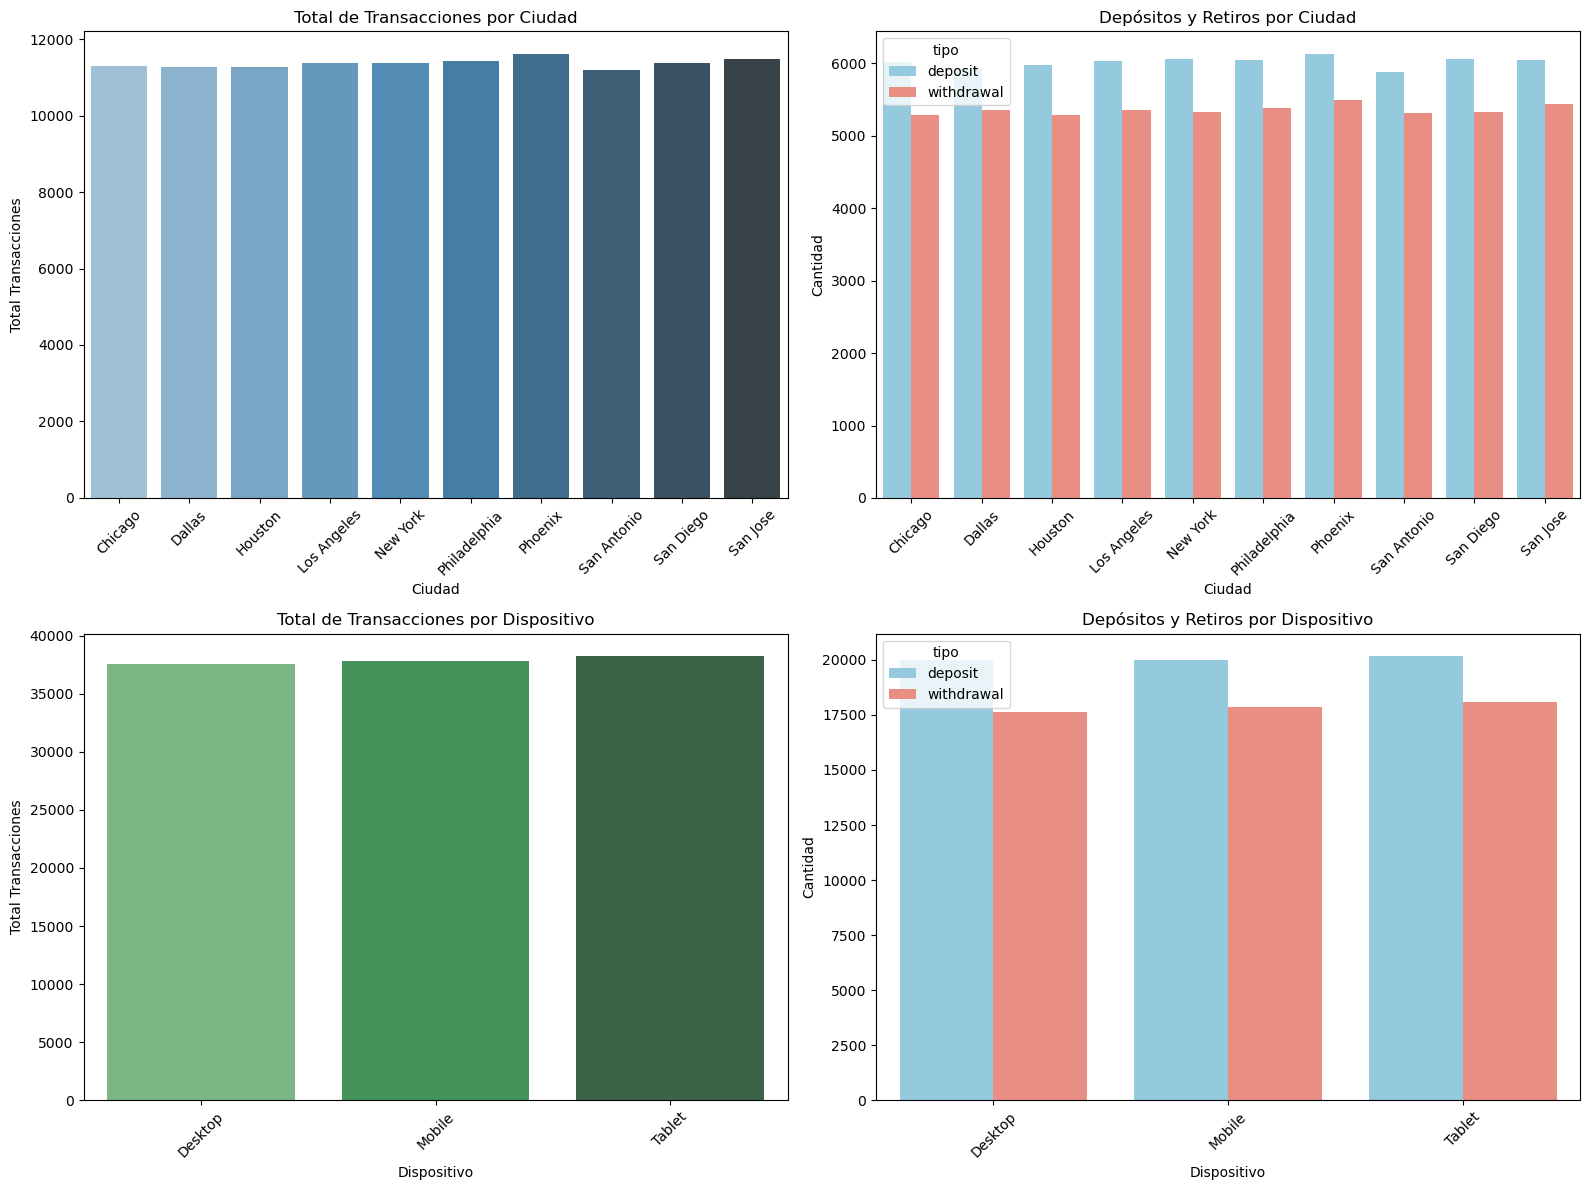

/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3_city = df_city_cat.groupby('city', group_keys=False).apply(lambda x: x.nlargest(top_k, 'count'))
/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:88: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3_device = df_device_cat.groupby('device', 

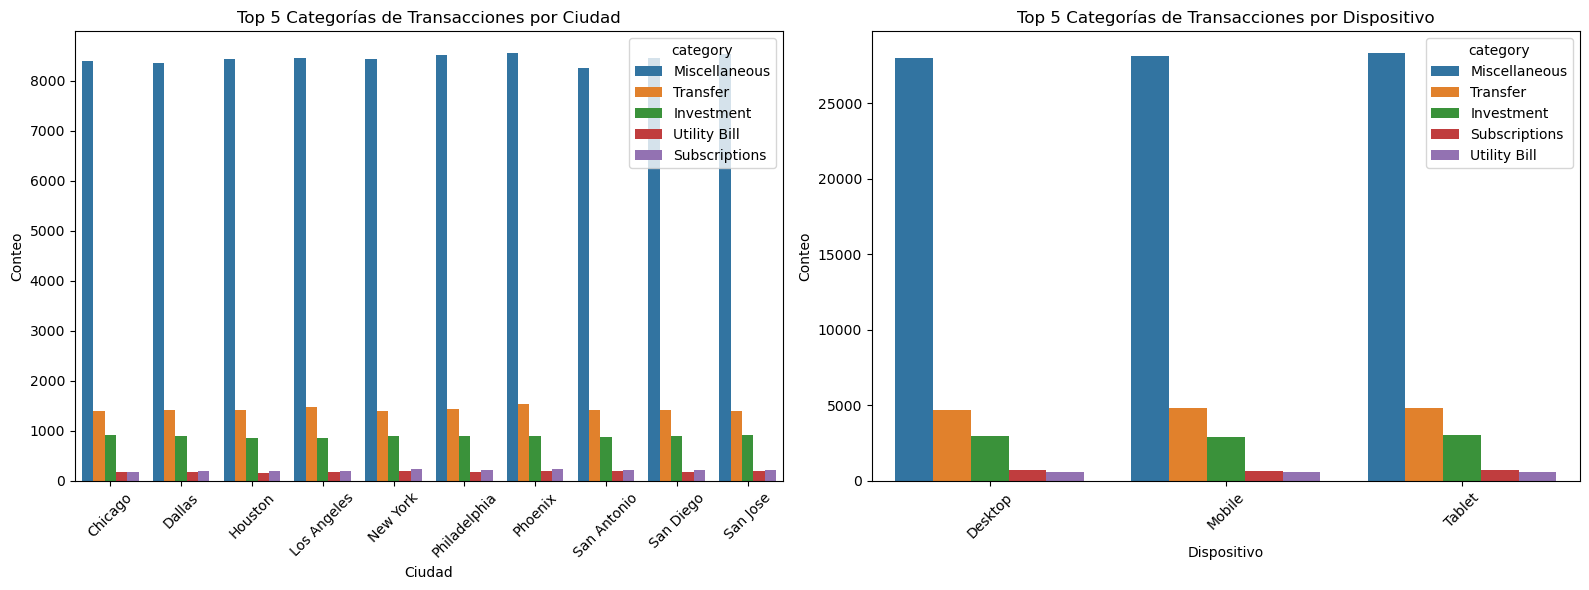

In [18]:
############################################
# GRÁFICOS PARA CIUDADES Y DISPOSITIVOS
# Con ayuda de GPT :)
############################################

# -------------------------------
# Datos por Ciudad
# -------------------------------

# Total de transacciones por ciudad
total_tx_city = df.groupby('city').size().reset_index(name='total_transactions')

# Depositos y retiros por ciudad
city_deposits_withdrawals = df.groupby(['city', 'transactionType']).size().unstack(fill_value=0).reset_index()

# -------------------------------
# Datos por Dispositivo
# -------------------------------

# Total de transacciones por dispositivo
total_tx_device = df.groupby('device').size().reset_index(name='total_transactions')

# Depositos y retiros por dispositivo
device_deposits_withdrawals = df.groupby(['device', 'transactionType']).size().unstack(fill_value=0).reset_index()

# -------------------------------
# Creación de la figura con 4 subplots (2x2)
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Total de transacciones por ciudad
sns.barplot(data=total_tx_city, x='city', y='total_transactions', ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Total de Transacciones por Ciudad')
axes[0, 0].set_xlabel('Ciudad')
axes[0, 0].set_ylabel('Total Transacciones')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Depósitos y retiros por ciudad
# Convertimos el DataFrame para tener una columna "tipo" y otra "cantidad"
city_dw_melted = pd.melt(city_deposits_withdrawals, id_vars='city', 
                          value_vars=['deposit', 'withdrawal'], 
                          var_name='tipo', value_name='cantidad')
sns.barplot(data=city_dw_melted, x='city', y='cantidad', hue='tipo', ax=axes[0, 1],
            palette=['skyblue', 'salmon'])
axes[0, 1].set_title('Depósitos y Retiros por Ciudad')
axes[0, 1].set_xlabel('Ciudad')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Total de transacciones por dispositivo
sns.barplot(data=total_tx_device, x='device', y='total_transactions', ax=axes[1, 0], palette='Greens_d')
axes[1, 0].set_title('Total de Transacciones por Dispositivo')
axes[1, 0].set_xlabel('Dispositivo')
axes[1, 0].set_ylabel('Total Transacciones')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Depósitos y retiros por dispositivo
device_dw_melted = pd.melt(device_deposits_withdrawals, id_vars='device', 
                           value_vars=['deposit', 'withdrawal'], 
                           var_name='tipo', value_name='cantidad')
sns.barplot(data=device_dw_melted, x='device', y='cantidad', hue='tipo', ax=axes[1, 1],
            palette=['skyblue', 'salmon'])
axes[1, 1].set_title('Depósitos y Retiros por Dispositivo')
axes[1, 1].set_xlabel('Dispositivo')
axes[1, 1].set_ylabel('Cantidad')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

############################################
# TOP 3 CATEGORÍAS DE TRANSACCIONES
# POR CIUDAD Y POR DISPOSITIVO
############################################
def get_top_categories(df, top_k = 5):
    # -------------------------------
    # Top 3 categorías por Ciudad
    # -------------------------------
    # Agrupamos por ciudad y categoría y contamos las ocurrencias
    df_city_cat = df.groupby(['city', 'category']).size().reset_index(name='count')
    # Para cada ciudad, seleccionamos las 3 categorías con mayor conteo
    df_top3_city = df_city_cat.groupby('city', group_keys=False).apply(lambda x: x.nlargest(top_k, 'count'))

    # -------------------------------
    # Top 3 categorías por Dispositivo
    # -------------------------------
    df_device_cat = df.groupby(['device', 'category']).size().reset_index(name='count')
    df_top3_device = df_device_cat.groupby('device', group_keys=False).apply(lambda x: x.nlargest(top_k, 'count'))

    # -------------------------------
    # Crear figura con 2 subplots: uno para ciudad y otro para dispositivo
    # -------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Top 3 categorías por Ciudad
    sns.barplot(data=df_top3_city, x='city', y='count', hue='category', ax=axes[0])
    axes[0].set_title(f'Top {top_k} Categorías de Transacciones por Ciudad')
    axes[0].set_xlabel('Ciudad')
    axes[0].set_ylabel('Conteo')
    axes[0].tick_params(axis='x', rotation=45)

    # Top 3 categorías por Dispositivo
    sns.barplot(data=df_top3_device, x='device', y='count', hue='category', ax=axes[1])
    axes[1].set_title(f'Top {top_k} Categorías de Transacciones por Dispositivo')
    axes[1].set_xlabel('Dispositivo')
    axes[1].set_ylabel('Conteo')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

get_top_categories(df)

In [19]:
df.device.value_counts()

device
Tablet     38270
Mobile     37844
Desktop    37585
Name: count, dtype: int64

/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3_city = df_city_cat.groupby('city', group_keys=False).apply(lambda x: x.nlargest(top_k, 'count'))
/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/ipykernel_70345/861813901.py:88: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3_device = df_device_cat.groupby('device', 

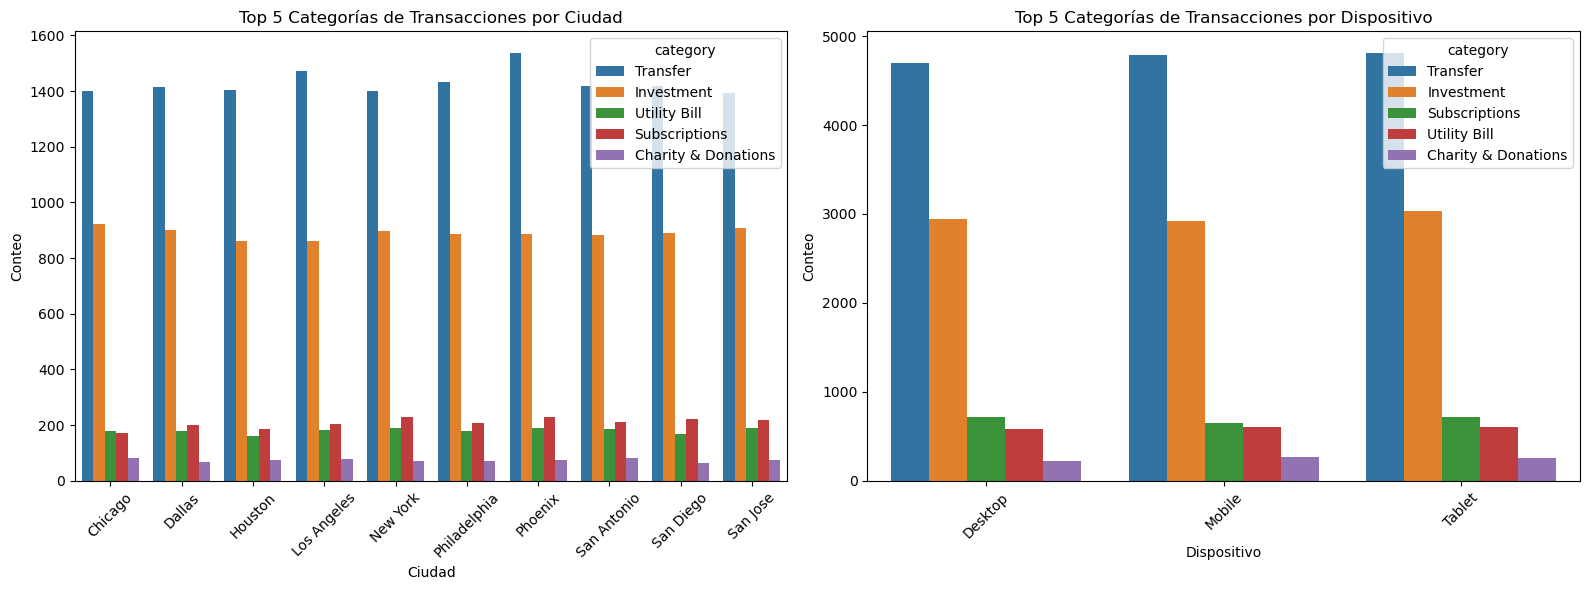

In [20]:
target = df[df.category != "Miscellaneous"]
get_top_categories(target, top_k=5)

<Axes: ylabel='count'>

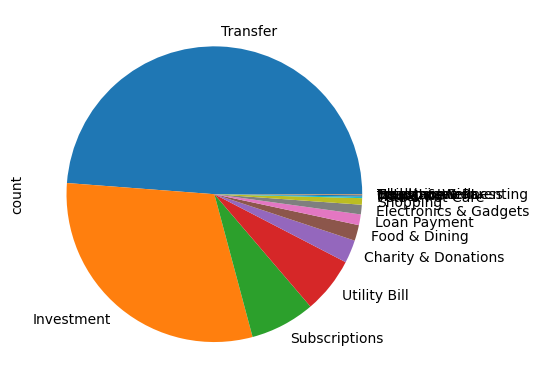

In [21]:
target.category.value_counts().plot.pie()

In [22]:
target.category.value_counts()

category
Transfer                 14297
Investment                8898
Subscriptions             2079
Utility Bill              1797
Charity & Donations        738
Food & Dining              505
Loan Payment               344
Electronics & Gadgets      308
Shopping                   208
Pets & Pet Care             47
Travel                      46
Insurance                   16
Transportation               7
Health & Wellness            5
Entertainment                2
Education                    1
Childcare & Parenting        1
Name: count, dtype: int64

#### Comentarios sobre el impacto de la ciudad y el dispositivo

Observando los graficos anteriores, podemos volver a ver que en general hay mas despositos que retiros (lo cual es bueno para nuestra operacion como banco). Ademas, podemos ver que a grandes rasgos, no se ve un impacto significativo sobre la cantidad, tipo o monto de transacciones producto del dispositivo o la ciudad. Los valores se mantienen bastante uniformes "a lo largo" del dominio de estas dos variables (ciudad y dispositivo). 

{Esto probablemente se deba a que cuando se sintetizaron estos datos, se hizo con una distribucion ~uniforme. En la vida real, probablmenete sí veriamos un impacto significativo sobre el tipo (y el monto) de transaccion en funcion del dispositivo. Por ejemplo, la gente tiende a realizar transacciones de montos mas grandes "o mas importantes" desde la pc en vez del celular o tablet}.

Por otro lado, observamos que las categorias mas populares entre nuestros clientes son las transferencias, las inversiones y la suscripciones (dejando de lado las transferencias que caen en categorias del tipo Miscelaneo y que no podemos atribuir a un uso espeficio en funcion de estos datos). 

La distribucion de categorias mas populares tambien se mantiene bastante constante para las ciudades y los dispositivos, afectandose apenas ligeramente el "podio" de categorias de transacciones para Chicago, en donde el 3er tipo mas popular son los utility bills en vez de las suscripciones (como en el resto de las ciudades), para la muestra en cuestion.

### 2.4) Velocidad de acreditacion de transacciones ⌛️

In [23]:
# Convert 'date' and 'value_date' columns to datetime objects
df['date'] = pd.to_datetime(df['date'])
df['value_date'] = pd.to_datetime(df['value_date'])

# Calculate the difference between 'value_date' and 'date'
df['date_diff'] = (df['value_date'] - df['date']).dt.days

# Display the DataFrame with the new 'date_diff' column
df.date_diff.value_counts()

date_diff
 0     113566
-1         85
-3         15
-2         10
-5          9
-4          8
-29         2
 1          1
-6          1
-8          1
-18         1
Name: count, dtype: int64

In [24]:
late = df[df.date_diff != 0]
late.head()

,account_id,date,transaction_details,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device,transactionType,month,date_diff
27377,1196711,2015-07-21,FD ISSUE DEPOSITS INITIA,2015-07-20,40000000.0,NaN,-1.015416e+09,Miscellaneous,Chicago,Desktop,withdrawal,7,-1
29942,1196711,2015-10-15,INTERNAL FUND TRANSFER IN,2015-10-14,15000000.0,NaN,-1.475668e+09,Transfer,San Antonio,Tablet,withdrawal,10,-1
32528,1196711,2016-02-22,INTERNAL FUND TRANSFER IN,2016-02-20,15000000.0,NaN,-1.563515e+09,Transfer,Los Angeles,Tablet,withdrawal,2,-2
34732,1196711,2016-08-01,1196711:Int.Coll:01-07-20,2016-07-31,6245376.0,NaN,-1.563885e+09,Miscellaneous,Philadelphia,Desktop,withdrawal,8,-1
35175,1196711,2016-10-03,FD BOOKING PROCEEDS DEPO,2016-09-30,80000000.0,NaN,-2.025588e+09,Travel,New York,Tablet,withdrawal,10,-3


In [25]:
(late.shape[0]/df.shape[0])* 100

0.11697552309167186

In [26]:
late.transactionType.value_counts()

transactionType
deposit       88
withdrawal    45
Name: count, dtype: int64

In [27]:
late.account_id.value_counts()

account_id
409000362497    73
1196711         49
1196428         11
Name: count, dtype: int64

In [28]:
late.category.value_counts()

category
Miscellaneous    52
Utility Bill     47
Transfer         25
Travel            8
Investment        1
Name: count, dtype: int64

In [29]:
late.transaction_details.value_counts()

transaction_details
Loan Payment Reversal For    30
Sweep Trf To: 40900036427    17
FD BOOKING 365 DAYS  DEPO     4
FUND REV TO FD BOOKING 36     3
Payments For : 9090000506     2
                             ..
INT ON FD 709003779660  B     1
722423231957                  1
722423231968                  1
722423231975                  1
Sweep Trf From: 709001931     1
Name: count, Length: 76, dtype: int64

Muy pocas transacciones tardaron mas de un dia en acreditarse (~0.12% del total de la muestra). Esto podria deberse a posibles casos de fraude, problemas en nuestros sistemas, transferencias internacionales, etc. Seria interesante realizar un estudio en mayor profunidad para estos casos y entender si existe algun denominador comun entre ellos. 

Por ejemplo, observamos que la mayoria de transacciones con delay corresponden a 3 usuarios de los 10 totales que tenemos, con uno de los 3 acumulando mas de la mitad de transacciones demoradas. 

Ademas, vemos que las dos descripciones mas repetidas en transacciones demoradas tienen una cantidad significativamente mayor a las demas. 

Tendria sentido estudiar estas variables en mayor detalle en el futuro para asegurarnos de que no tengamos problemas de seguridad relacionados y/o optimizar nuestros sistemas en caso de que sea producto de downtimes / errores operativos.

## 3) Posibles casos de uso de Machine Learning 🧠

Dentro de los posibles casos de uso para tecnicas de ML en el dataset dado, podemos mencionar:

    
- **Segmentación de clientes:** mas alla de las heuristicas previamente mencionadas relacionadas con la actividad de los usuarios y su fidelidad, se podrian utilizar modelos de clustering con las variables dadas y las creadas para agrupar a nuestros clientes y optimizar nuestros esfuerzos de marketing.

- **Forecasting de transacciones:** tanto para los depositos como los retiros, podriamos entrenar modelos de forecasting para predecir el momento en el que se realizara la proxima transaccion y el monto de la misma, lo cual nos permitiria inferir tambien el balance general de cada cuenta en el futuro.

- **Deteccion de operaciones fraudulentas**: en caso de contar con informacion de fraude / no fraude para las transacciones dadas (variable que actualmente no esta presente en la muestra), podriamos entrenar un modelo de clasificacion con aprendizaje supervisado para detectar y frenar operaciones ilegales. Tambien podriamos utilizar el historico de transacciones de estos clientes para generar variables para modelos de scoring de riesgo crediticio.

- **Clasificacion de categorias de transacciones**: podemos entrenar un clasificador multiclase para predecir el *tipo* de transaccion realizado en funcion de la descripcion provista por el banco. Esto puede ser util para fines descriptivos y de analisis de nuestros clientes, asi como tambien para optimizar los productos financieros que podemos ofrecerles. Por ejemplo, podriamos ofrecerles prestamos o seguros para inversiones especificas, descuentos en productos de comida, etc., luego de analizar su historia previa de comportamiento transaccional con etiquetas que nos aporten informacion valiosa.


## 4) Entrenamiento de un clasificador de transacciones

Como mencionamos en el item anterior, con los datos que tenemos en la muestra, es posible entrenar a un clasificador de transacciones en funcion de las descripciones generadas por el banco (transaction_details).

Hipotesis del modelo:

- "transaction_details" es un campo auto generado por los sistemas bancarios y estará disponible al momento de la inferencia
- No conocemos la variable "category" al momento de la transferencia, es de nuestro interes predecir esta variable para poder tomar mejores decisiones de negocio en el futuro, como por ejemplo analizar el comportamiento de nuestros usuarios, detectar potenciales operaciones sospechosas y ofrecerles mejores productos financieros.
- El resto de variables de la muestra estarán disponibles al momento de la inferencia. 
- La muestra es representativa de la poblacion de transacciones y no se observará un drift en el modelo y/o en los features en el corto-mediano plazo. 
- Los datos llegaran a nuestro pipeline de inferencia en el mismo formato que se recibieron en este notebook.

Si bien a priori utilizaremos todas las variables disponibles, es de esperar que la descripcion de la transaccion generada por el banco sea la variable con mas peso para nuestra prediccion. 

Por tratarse de una variable en formato texto, generaremos una vectorizacion de la misma utilizando TFID (cuenta la frecuencia de las palabras en nuestro diccionario) que luego usaremos como features en nuestros modelos de clasificacion. 

En caso de que el modelo no performe lo suficientemente bien, se explorara la posibilidad de utilizar tecnicas de representacion de texto mas sofisticadas, como text embeddings. Aunque a priori, observando la variable descricion, no pareciera haber muchas relaciones contextuales o semanticas que los embeddings pudieran explotar.

### Enriquecemos el dataframe original con las variables que generamos previamente en el EDA?

In [30]:
grouped.shape

(10, 16)

In [31]:
df.shape

(113699, 13)

In [32]:
df_merged = pd.merge(df, grouped.reset_index(), on='account_id', how='left')
df_merged.shape

(113699, 29)

In [33]:
df_merged.head(3)

,account_id,date,transaction_details,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device,...,std_balance,total_transactions,negative_balance_days,active_months,cashflow_delta,customer_age_days,customer_age_months,customer_age_years,transactions_per_day,active_month_ratio
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2017-06-29,NaN,1000000.0,1000000.0,Transfer,New York,Tablet,...,1.144514e+06,1093,0,21,462200.0,854,28.055191,2.337933,1.279859,0.748525
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2017-07-05,NaN,1000000.0,2000000.0,Transfer,Phoenix,Mobile,...,1.144514e+06,1093,0,21,462200.0,854,28.055191,2.337933,1.279859,0.748525
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2017-07-18,NaN,500000.0,2500000.0,Investment,Dallas,Tablet,...,1.144514e+06,1093,0,21,462200.0,854,28.055191,2.337933,1.279859,0.748525


Si bien podriamos intentar entrenar al modelo con *todas* las variables que tenemos disponibles. Intentaremos primero con un modelo lo mas sencillo posible, con la menor cantidad de variables, para evitar "the curse of dimensionality" y no agregar variables que no agreguen valor predictivo. 

### Unificacion de categorias poco frecuentes en "Others"

Previamente observamos que hay varias categorias de transacciones en el dataset, pero que algunas de ellas tienen una frecuencia muy baja, lo cual seguramente dificulte que nuestro modelo pueda generalizar en sus predicciones. 

Por este motivo, unificaremos dentro de una unica categoria llamada "others" las transacciones que tengan pocas ocurrencias:

In [34]:
model_df = df.copy()

In [35]:
model_df.category.value_counts()

category
Miscellaneous            84400
Transfer                 14297
Investment                8898
Subscriptions             2079
Utility Bill              1797
Charity & Donations        738
Food & Dining              505
Loan Payment               344
Electronics & Gadgets      308
Shopping                   208
Pets & Pet Care             47
Travel                      46
Insurance                   16
Transportation               7
Health & Wellness            5
Entertainment                2
Education                    1
Childcare & Parenting        1
Name: count, dtype: int64

In [36]:
classes = model_df.category.value_counts().index.tolist()
classes

['Miscellaneous',
 'Transfer',
 'Investment',
 'Subscriptions',
 'Utility Bill',
 'Charity & Donations',
 'Food & Dining',
 'Loan Payment',
 'Electronics & Gadgets',
 'Shopping',
 'Pets & Pet Care',
 'Travel',
 'Insurance',
 'Transportation',
 'Health & Wellness',
 'Entertainment',
 'Education',
 'Childcare & Parenting']

In [37]:
low_freq = ['Pets & Pet Care', 'Travel',
       'Insurance', 'Transportation', 'Health & Wellness', 'Entertainment',
       'Education', 'Childcare & Parenting']
not_low_freq = [x for x in classes if x not in low_freq]

Estamos entrenando a nuestro modelo sobre un conjunto de clases determinado. en el futuro no sabemos si pueden surgir nuevas clases. por este motivo, en caso de que surjan clases nuevas, las guardaremos dentro de "others" y avisaremos en logs.

In [38]:
not_low_freq

['Miscellaneous',
 'Transfer',
 'Investment',
 'Subscriptions',
 'Utility Bill',
 'Charity & Donations',
 'Food & Dining',
 'Loan Payment',
 'Electronics & Gadgets',
 'Shopping']

> si X NO existe en not_low_freq quiere decir que SI existe en low_freq o bien no existe en ninguna de las dos --> es una nueva variable, la categorizamos como others.

In [39]:
# Crear la nueva columna que comprima las clases poco representadas en others. (las nuevas tambien)
model_df['target_category'] = model_df['category'].apply(lambda x: 'others' if x not in not_low_freq else x)

# Mostrar los primeros registros para verificar
model_df.target_category.value_counts()

target_category
Miscellaneous            84400
Transfer                 14297
Investment                8898
Subscriptions             2079
Utility Bill              1797
Charity & Donations        738
Food & Dining              505
Loan Payment               344
Electronics & Gadgets      308
Shopping                   208
others                     125
Name: count, dtype: int64

In [40]:
model_df = model_df.drop("category", axis = 1)

In [41]:
print(f"total classes: {len(model_df.target_category.value_counts().index)}")

total classes: 11


### Baseline model

Creamos un primer modelo baseline contra el cual luego compararemos en caso de necesitar entrenar variantes mas complejas. Si bien seria pertinente entrenar un modelo sencillo como una regresion logistica "one vs all", iremos con random forest sin tuneo de hiperparametros para simplificar el entrenamiento y no complejizar de mas el codigo.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [43]:
raw_features = model_df.columns.tolist()
print(f"Model raw features: {raw_features}")

Model raw features: ['account_id', 'date', 'transaction_details', 'value_date', 'withdrawal_amt', 'deposit_amt', 'balance_amt', 'city', 'device', 'transactionType', 'month', 'date_diff', 'target_category']


#### Antes que nada, realizamos el split para evitar leakage (!)

In [44]:
X = model_df.drop(columns=['target_category'])
y = model_df['target_category']

# Split 80-20 estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}\n")

y_train = np.array(y_train)
y_test = np.array(y_test.values)

Tamaño del conjunto de entrenamiento: 90959
Tamaño del conjunto de prueba: 22740



#### Transformamos los features para que esten listos para el modelo

In [45]:
model_df.dtypes

account_id                     object
date                   datetime64[ns]
transaction_details            object
value_date             datetime64[ns]
withdrawal_amt                float64
deposit_amt                   float64
balance_amt                   float64
city                           object
device                         object
transactionType                object
month                           int32
date_diff                       int64
target_category                object
dtype: object

In [46]:
def decompose_dates(X):
    # Descomponer las fechas
    X['year'] = X['date'].dt.year
    X['month_date'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X['weekday'] = X['date'].dt.weekday

    X['year_value_date'] = X['value_date'].dt.year
    X['month_value_date'] = X['value_date'].dt.month
    X['day_value_date'] = X['value_date'].dt.day
    X['weekday_value_date'] = X['value_date'].dt.weekday

    # Eliminar las columnas originales de fecha después de extraer las características
    X = X.drop(columns=['date', 'value_date'])
    
    return X

# aplicamos la transformacion para los features de fechas para ambos X_train y X_test
X_train = decompose_dates(X_train)
X_test = decompose_dates(X_test)

In [47]:
X_train.columns

Index(['account_id', 'transaction_details', 'withdrawal_amt', 'deposit_amt',
       'balance_amt', 'city', 'device', 'transactionType', 'month',
       'date_diff', 'year', 'month_date', 'day', 'weekday', 'year_value_date',
       'month_value_date', 'day_value_date', 'weekday_value_date'],
      dtype='object')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_features', TfidfVectorizer(), 'transaction_details'), 
        ('numerical_features', Pipeline(
            [
                ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                ('scaler', StandardScaler()) # esta linea guardará el scaler (media y desvio) fiteado con los datos que se le pasen a .fit --> cuando se aplique sobre test, no estara haciendo leakeage ya que los parametros del scaler seran los de train.
            ]
        )
        , ['withdrawal_amt', 'deposit_amt', 'balance_amt', 'month', 'date_diff', 
            'year', 'month_date', 'day', 'weekday', 'year_value_date', 'month_value_date', 
            'day_value_date', 'weekday_value_date']),
        ('categorical_features', Pipeline(
            [
                ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]
        ), ['account_id', 'city', 'device', 'transactionType'])  # Variables categóricas
    ]
)

# Definir el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesar las features
    ('classifier', RandomForestClassifier())  # Entrenar el modelo
])

# Ajustar el pipeline al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text_features',
                                                  TfidfVectorizer(),
                                                  'transaction_details'),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['withdrawal_amt',
                                                   'deposit_amt', 'balance_amt',
                                                   'month', 'date_diff', 'year',
                                                   'month_date', 'day',
                                                   'weekday', 'year_value_date',
                                                   'month_value_date',
                                                   'day_value_date',
                                                   'weekday_value_date']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['account_id', 'city',
                                                   'device',
                                                   'transactionType'])])),
                ('classifier', RandomForestClassifier())])

Lo que vemos arriba es la representacion grafica del modelo de clasificacion generado y su pipeline de preprocesado de datos. Los pasos consisten en:

1) Vectorizar las variables de texto (descripcion) usandom un TFID frequency vectorizer
2) Imputar NaNs con ceros y escalar usando un standard scaler en variables numericas
3) Imputar valores NaNs con "unknowns" en variables categoricas y encodearlas usando one hot encoding
4) Entrenar un Random Forest Clasifier

##### Cross validation score en train

In [49]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

cv_mean, cv_std

(np.float64(0.9969216893863498), np.float64(0.00019972257728496557))

> El modelo parece generalizar bien en los folds de validacion. Lo guardamos y lo testeamos sobre el test set

In [50]:
import pickle

pipeline_filename = 'weights/trained_pipeline_v2.pkl'
with open(pipeline_filename, 'wb') as f:
    pickle.dump(pipeline, f)

pipeline_filename

'trained_pipeline_v0.pkl'

In [65]:
X_test.to_parquet("bank_trasactions_test.parquet")

### Evaluamos nuestro baseline model

In [51]:
loaded_pipeline = pickle.load(open('weights/trained_pipeline_v2.pkl', 'rb'))
loaded_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text_features',
                                                  TfidfVectorizer(),
                                                  'transaction_details'),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['withdrawal_amt',
                                                   'deposit_amt', 'balance_amt',
                                                   'month', 'date_diff', 'year',
                                                   'month_date', 'day',
                                                   'weekday', 'year_value_date',
                                                   'month_value_date',
                                                   'day_value_date',
                                                   'weekday_value_date']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['account_id', 'city',
                                                   'device',
                                                   'transactionType'])])),
                ('classifier', RandomForestClassifier())])

In [52]:
y_pred_train = loaded_pipeline.predict(X_train)
y_pred_test = loaded_pipeline.predict(X_test)

# Evaluar el rendimiento y potencial overfitting
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

Train Accuracy: 1.0
Test Accuracy: 0.9973175021987687


> Bueno, a priori podemos decir que el modelo esta generalizando bien. que pasa si miramos un poco mas en detalle las metricas de clasificacion para el test set?

In [53]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)

print("==================================================================")
print("                        Test Set Clasiffication Report")
print("==================================================================\n")
print(report)

                        Test Set Clasiffication Report

                       precision    recall  f1-score   support

  Charity & Donations       1.00      0.97      0.99       148
Electronics & Gadgets       1.00      0.95      0.98        62
        Food & Dining       1.00      0.83      0.91       101
           Investment       1.00      1.00      1.00      1780
         Loan Payment       1.00      0.93      0.96        69
        Miscellaneous       1.00      1.00      1.00     16880
             Shopping       1.00      0.93      0.96        41
        Subscriptions       1.00      0.99      0.99       416
             Transfer       1.00      1.00      1.00      2859
         Utility Bill       1.00      0.99      0.99       359
               others       1.00      0.68      0.81        25

             accuracy                           1.00     22740
            macro avg       1.00      0.93      0.96     22740
         weighted avg       1.00      1.00      1.00     227

### Analisis del modelo

> Nuestro baseline model esta performando bastante bien. En todas las clases en test conseguimos una precision del 100%, aunque en alguna tenemos recalls mas bajos. Estas son las que estan peor representadas en el dataset (menor frecuencia) como others o Shopping, por lo que intentar aumentar la cantidad de muestras de estas clases en nuestro dataset de entrenamiento será útil para mejorar a nuestro modelo.

> Tambien podriamos sintetizar mas datos de las clases menos representadas, utilizando tecnicas de oversampling como SMOTE o bien tecnicas mas recientes que estan demostrando mejoras en estos campos como la utilizacion de GANs.

> Podriamos tambien realizar optimizacion de hyperparametros utilizando tecnicas de busqueda como Random o Grid Search, o librerias de optimizacion como Optuna. 

> Seria válido a su vez, utilizar librerias de AutoML como AutoGluon de AWS, para intentar generar modelos predictivos mejores y orientar de manera mas eficiente nuestra experimentacion.

> Como el modelo es bastante bueno para la instancia en la que nos encontramos. Vamos a proceder con esta primera iteracion y generar un pipeline de entrenamiento e inferencia para ponerlo en produccion.

### Entrenamiento del modelo final

Ya sabiendo que nuestro modelo parece generalizar bien, vamos a utilizar todos los datos que tenemos disponibles hasta la fecha de hoy y entrenarlo con estos. Para asegurarnos que nuestro modelo sigue generalizando bien, analizaremos los scores en folds de validacion. 

Guardaremos nuestro modelo en un pkl file, que luego será levantado por nuestro pipeline de inferencia a la hora de realizar predicciones. El mismo podria guardarse en un model registry o storage account, idealmente con versionado y registro de los features y tecnicas utilizadas.

In [54]:
final_df = model_df.copy()

X_final = final_df.drop(columns=['target_category'])
y_final = final_df['target_category']

X_final = decompose_dates(X_final)

In [55]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesar las features
    ('classifier', RandomForestClassifier())  # Entrenar el modelo
])

# Ajustar el pipeline al conjunto de entrenamiento
final_pipeline.fit(X_final, y_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text_features',
                                                  TfidfVectorizer(),
                                                  'transaction_details'),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['withdrawal_amt',
                                                   'deposit_amt', 'balance_amt',
                                                   'month', 'date_diff', 'year',
                                                   'month_date', 'day',
                                                   'weekday', 'year_value_date',
                                                   'month_value_date',
                                                   'day_value_date',
                                                   'weekday_value_date']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['account_id', 'city',
                                                   'device',
                                                   'transactionType'])])),
                ('classifier', RandomForestClassifier())])

In [56]:
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

cv_mean, cv_std

(np.float64(0.996998645081771), np.float64(0.00019854246645259227))

In [57]:
y_pred_final = final_pipeline.predict(X_final)

In [58]:
final_report = classification_report(y_final, y_pred_final)
print(final_report)

                       precision    recall  f1-score   support

  Charity & Donations       1.00      1.00      1.00       738
Electronics & Gadgets       1.00      1.00      1.00       308
        Food & Dining       1.00      1.00      1.00       505
           Investment       1.00      1.00      1.00      8898
         Loan Payment       1.00      1.00      1.00       344
        Miscellaneous       1.00      1.00      1.00     84400
             Shopping       1.00      1.00      1.00       208
        Subscriptions       1.00      1.00      1.00      2079
             Transfer       1.00      1.00      1.00     14297
         Utility Bill       1.00      1.00      1.00      1797
               others       1.00      1.00      1.00       125

             accuracy                           1.00    113699
            macro avg       1.00      1.00      1.00    113699
         weighted avg       1.00      1.00      1.00    113699



In [64]:
pipeline_filename = 'weights/trained_pipeline_v1.pkl'
with open(pipeline_filename, 'wb') as f:
    pickle.dump(final_pipeline, f)

### Test data-point prediction

In [59]:
data_point = decompose_dates(final_df.head(1).drop("target_category", axis =1))

In [60]:
data_point

,account_id,transaction_details,withdrawal_amt,deposit_amt,balance_amt,city,device,transactionType,month,date_diff,year,month_date,day,weekday,year_value_date,month_value_date,day_value_date,weekday_value_date
0,409000611074,TRF FROM Indiaforensic SERVICES,NaN,1000000.0,1000000.0,New York,Tablet,deposit,6,0,2017,6,29,3,2017,6,29,3


In [61]:
final_pipeline.predict(data_point)

array(['Transfer'], dtype=object)

In [ ]:
pd.DataFrame(final_df.columns.tolist()).to_csv("registry/model_features.csv", index= False, header=False)

### Aclaracion importante:

Para demostrar el modelo funcionando, no utilizaremos este ultimo modelo entrenado con todo el dataset, sino el primero que solo habia visto el split de entrenamiento. Lo haremos de esta manera para simplificar el proceso de inferencia simulando una lectura de un wharehouse con "data nueva" la cual sera en realidad el set de testeo, pero que el modelo no habra visto nunca aun.

### Explainability

Queda pendiente un analisis de explicabilidad del modelo. Entre las posibilidades, podriamos empezar por extraer los features importances del arbol de decision o bien realizar un SHAP Analysis para entender cuales son las variables que mas impactan la decision del modelo.